In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
from statsmodels.tsa.stattools import adfuller

In [46]:
savings = [[4.9],
       [5.2],
       [5.7],
       [5.7],
       [6.2],
       [6.7],
       [6.9],
       [7.1],
       [6.6],
       [7. ],
       [6.9],
       [6.4],
       [6.6],
       [6.4],
       [7. ],
       [7.3],
       [6. ],
       [6.3],
       [4.8],
       [5.3],
       [5.4],
       [4.7],
       [4.9],
       [4.4],
       [5.1],
       [5.3],
       [6. ],
       [5.9],
       [5.9],
       [5.6],
       [5.3],
       [4.5],
       [4.7],
       [4.6],
       [4.3],
       [5. ],
       [5.2],
       [6.2],
       [5.8],
       [6.7],
       [5.7],
       [6.1],
       [7.2],
       [6.5],
       [6.1],
       [6.3],
       [6.4],
       [7. ],
       [7.6],
       [7.2],
       [7.5],
       [7. ],
       [7.6],
       [7.2],
       [7.5],
       [7.8],
       [7.2],
       [7.5],
       [5.6],
       [5.7],
       [4.9],
       [5.1],
       [6.2],
       [6. ],
       [6.1],
       [7.5],
       [7.8],
       [8. ],
       [8. ],
       [8.1],
       [7.6],
       [7.1],
       [6.6],
       [5.6],
       [5.9],
       [6.6],
       [6.8],
       [7.8],
       [7.9],
       [8.7],
       [7.7],
       [7.3],
       [6.7],
       [7.5],
       [6.4],
       [9.7],
       [7.5],
       [7.1],
       [6.4],
       [6. ],
       [5.7],
       [5. ],
       [4.2],
       [5.1],
       [5.4],
       [5.1],
       [5.3],
       [5. ],
       [4.8],
       [4.7],
       [5. ],
       [5.4]]
savings = [x.pop() for x in savings]
dates = pd.date_range(start ='1955-01-01',  
         end ='1980-07-01', freq ='3M')
dic = {'dates':dates, 'savings':savings}
df= pd.DataFrame(dic)
df.head()

,dates,savings
0,1955-01-31,4.9
1,1955-04-30,5.2
2,1955-07-31,5.7
3,1955-10-31,5.7
4,1956-01-31,6.2


In [47]:
df.set_index('dates', inplace=True)

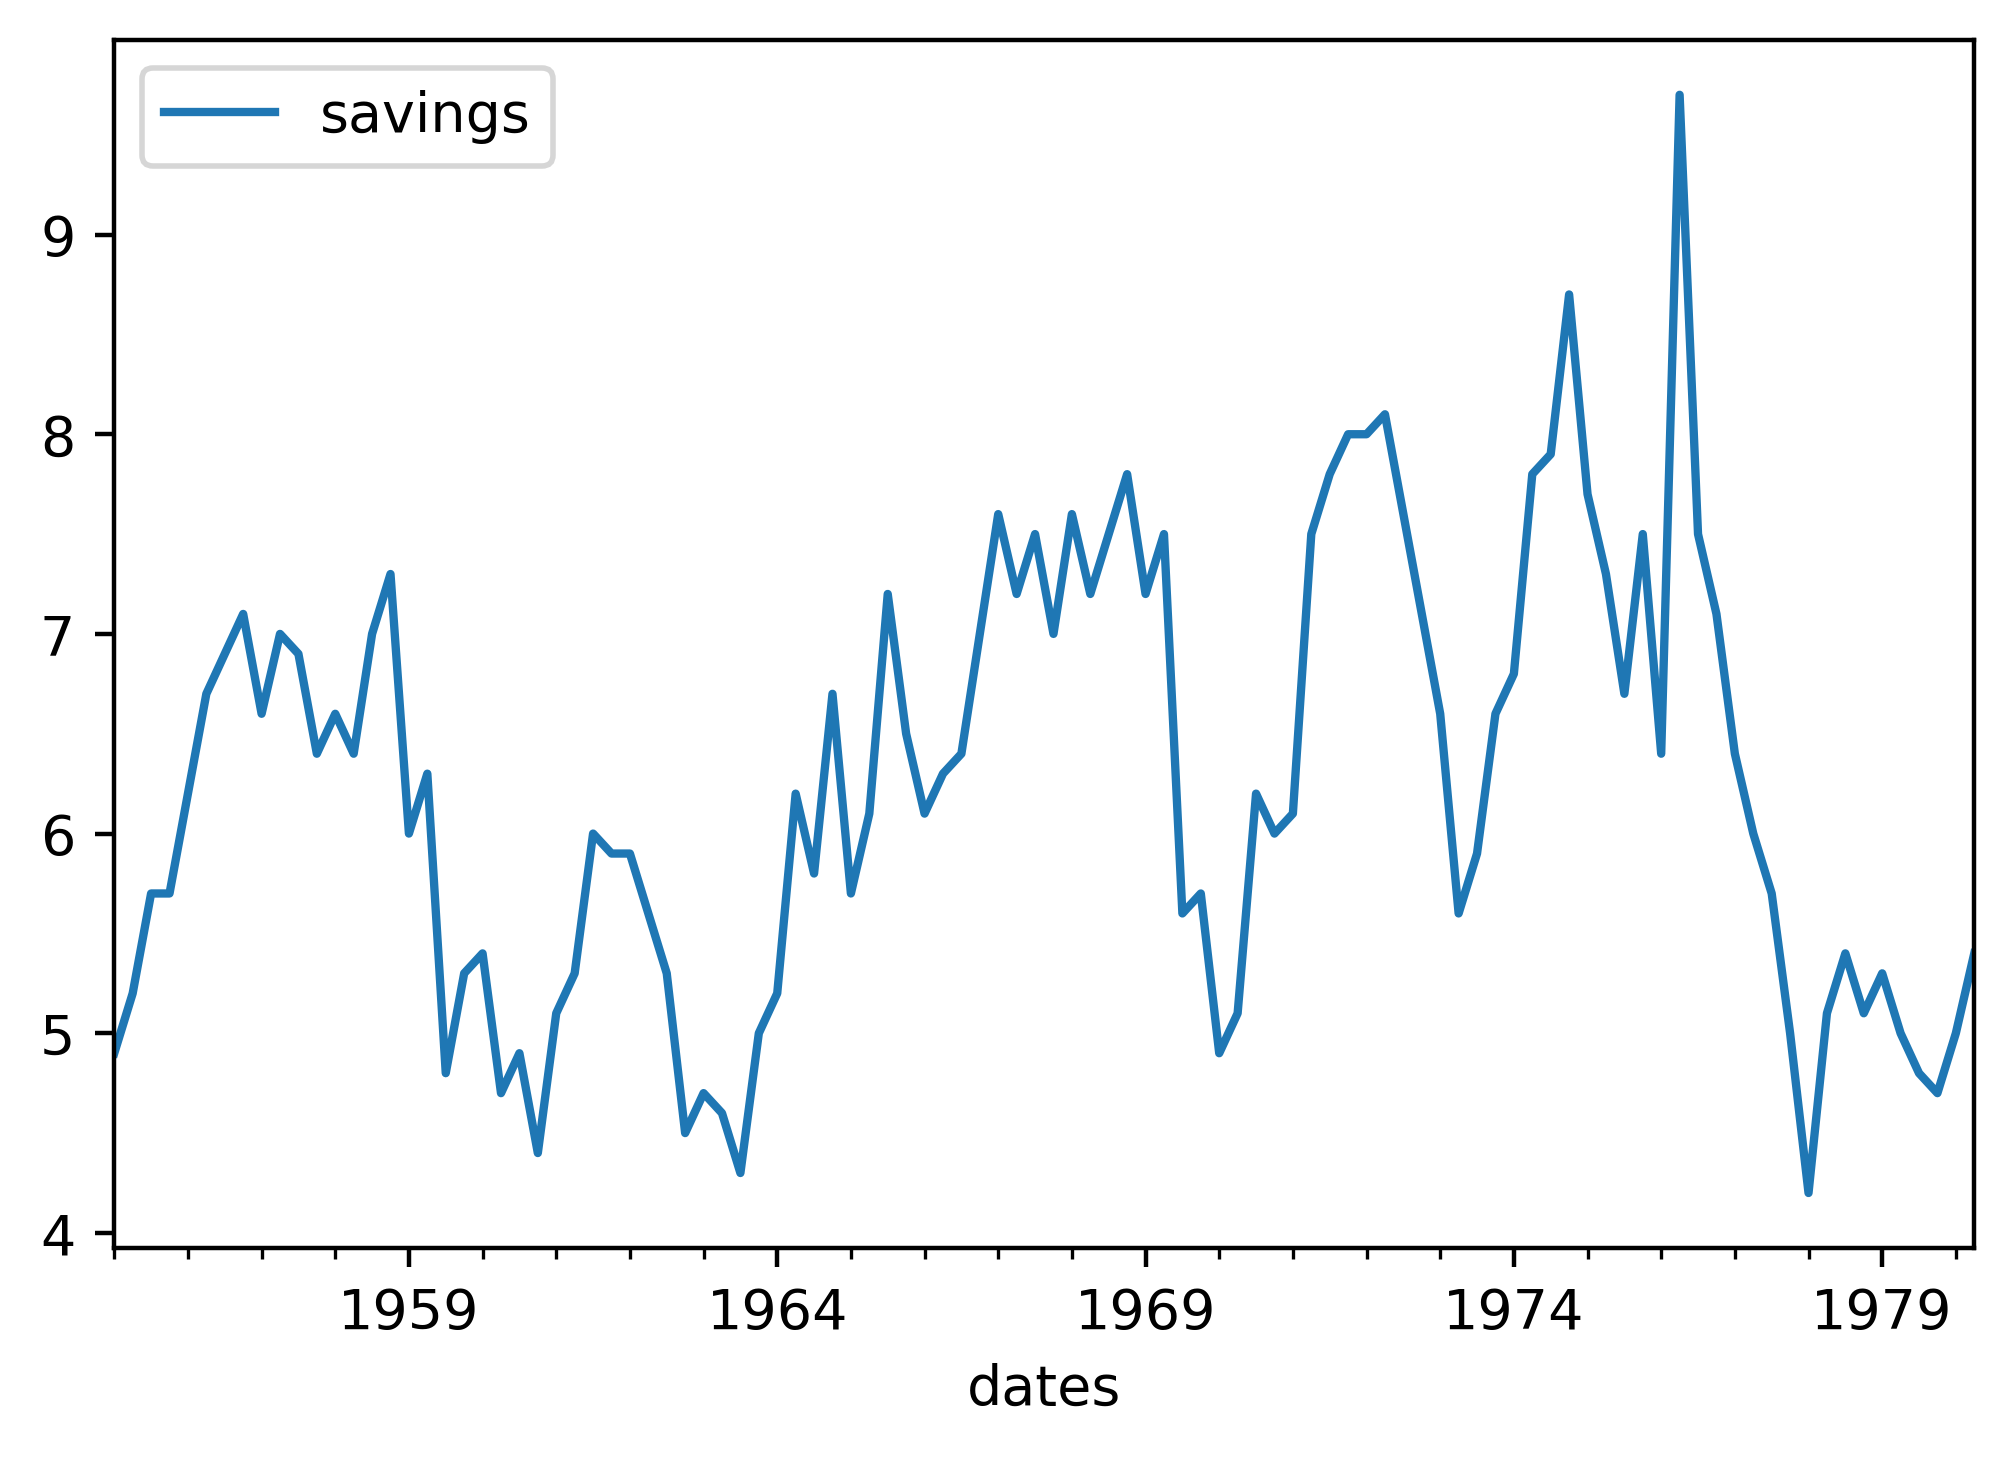

In [49]:
df.plot()
plt.show()

In [53]:
result = adfuller(df['savings'])
print('ADF statistic is: {:.2f}'.format(result[0]))
print('p value is: {:.2f}'.format(result[1]))
print('Minimum adfuller value required for 0.05 significance is: {:.2f}'.format(result[4].get('5%')))

ADF statistic is: -3.19
p value is: 0.02
Minimum adfuller value required for 0.05 significance is: -2.89


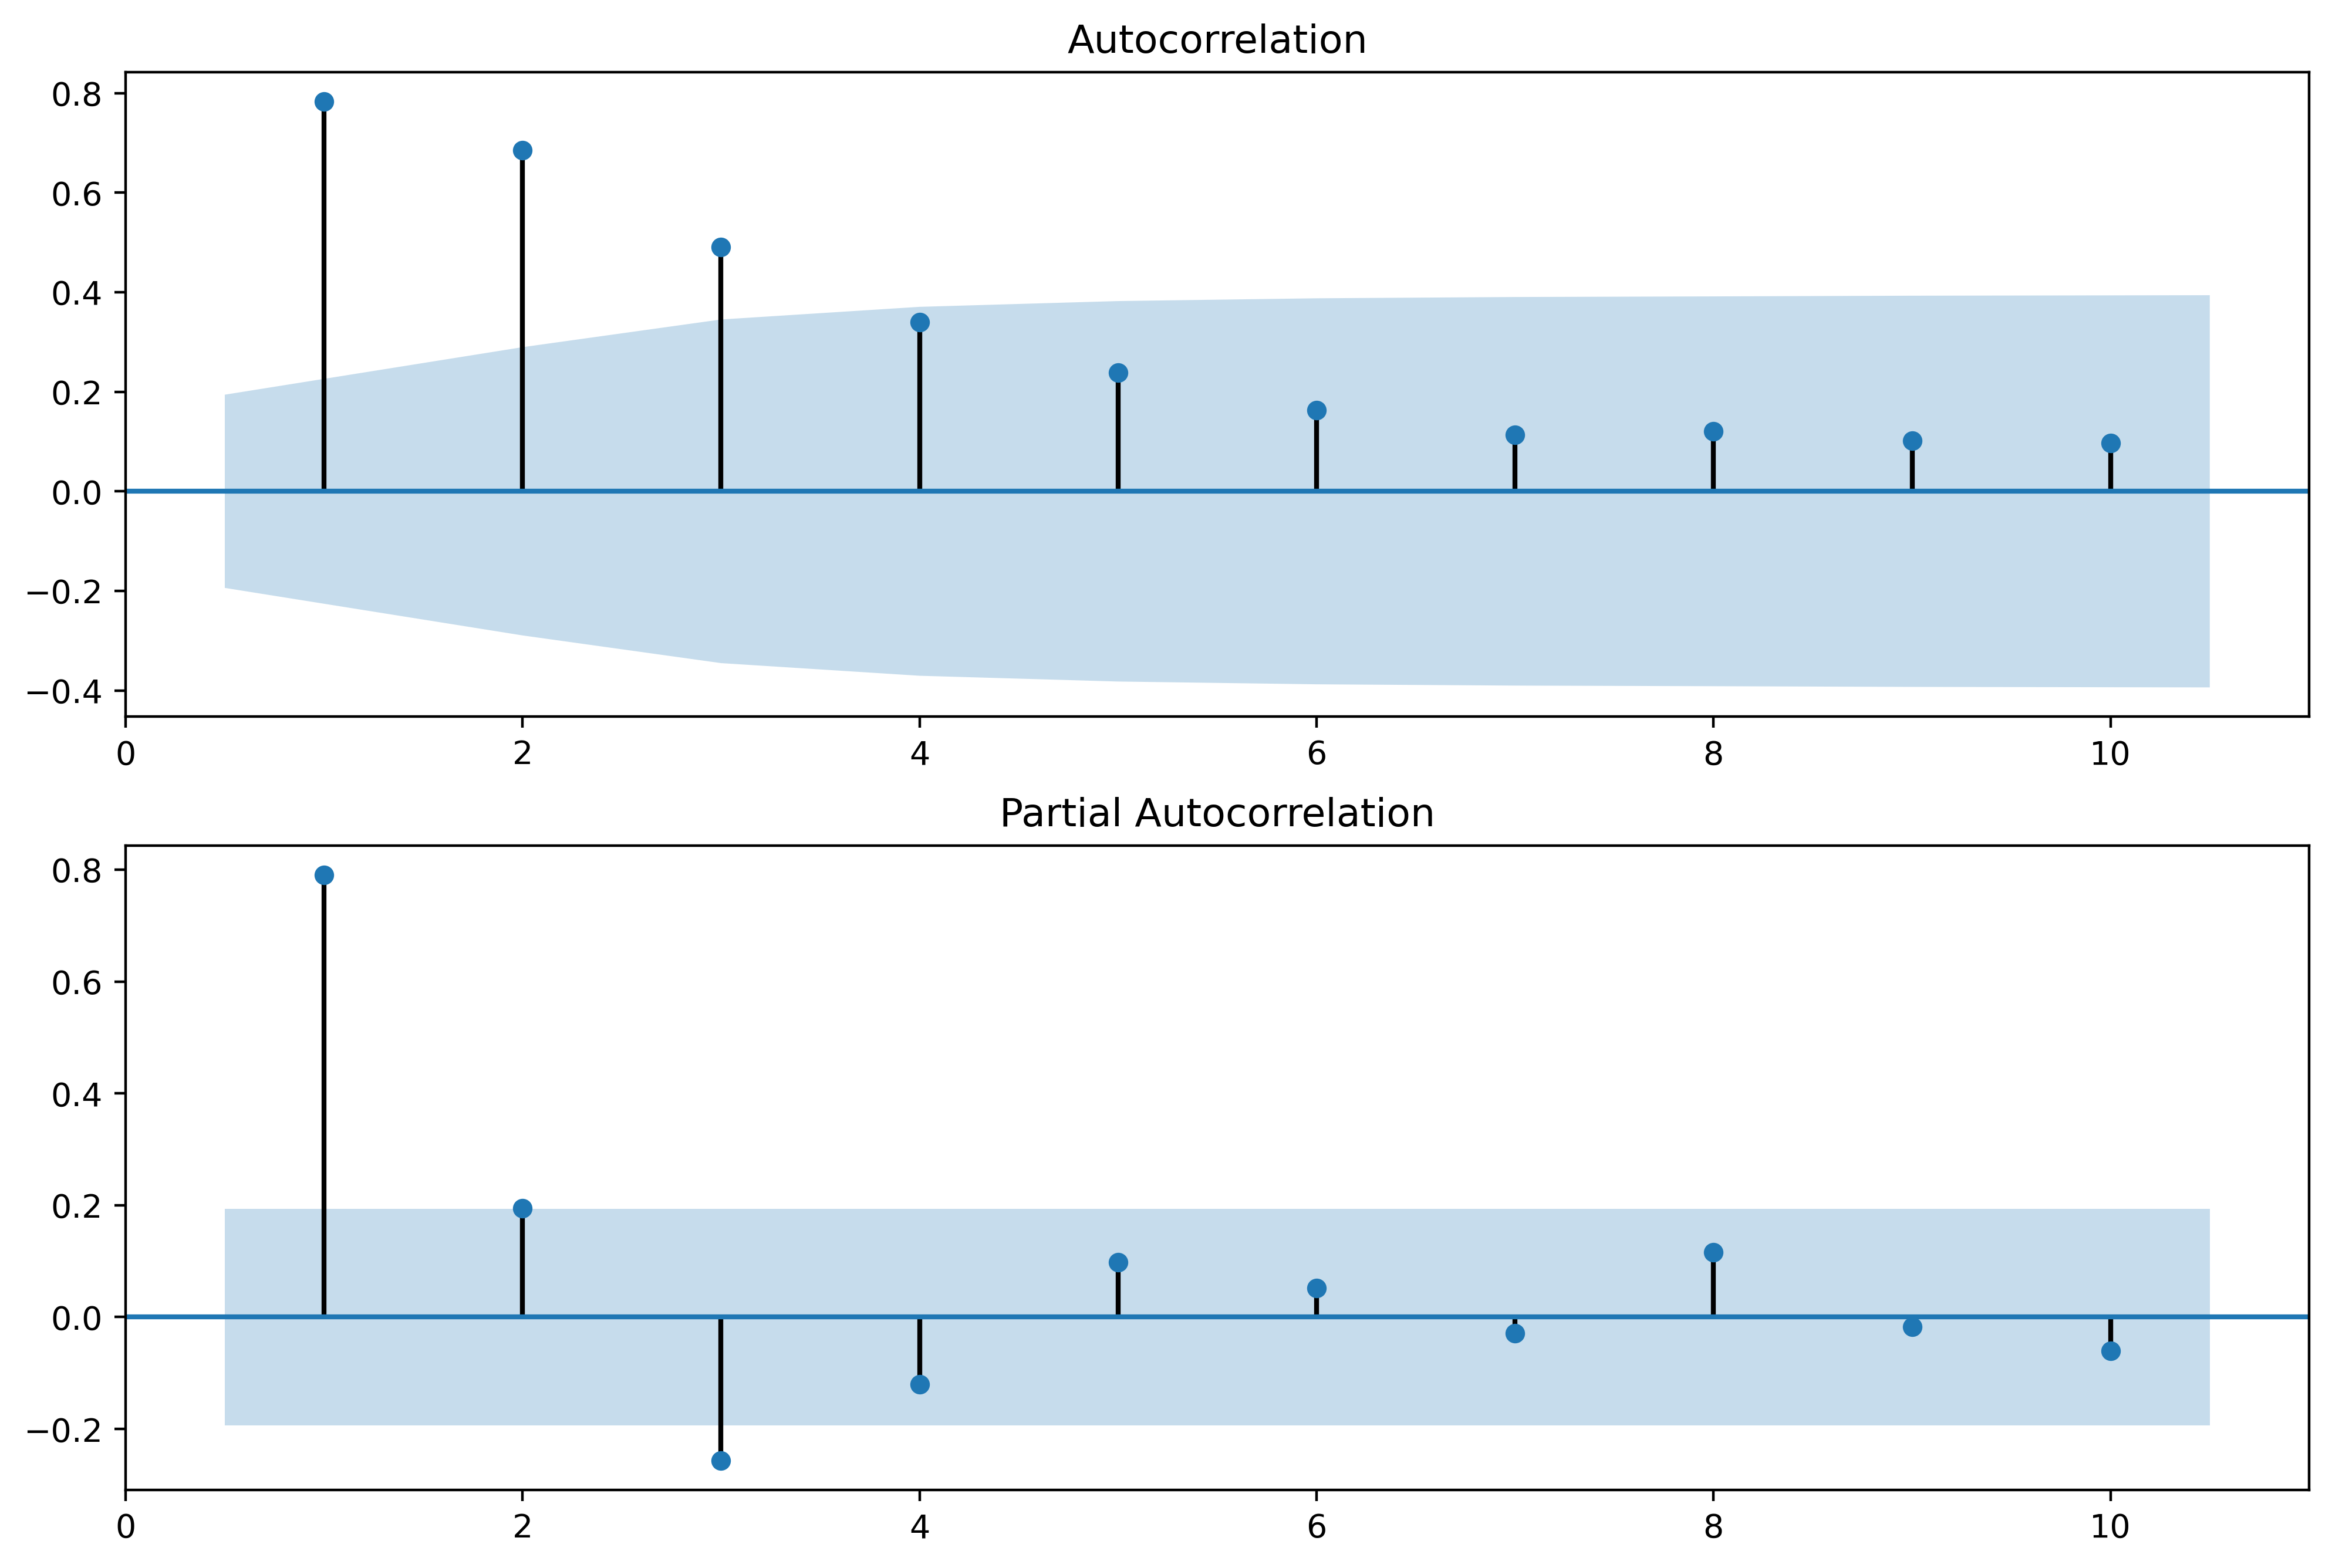

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(savings, lags=10, zero=False, ax=ax1)
plot_pacf(savings, lags=10, zero=False, ax=ax2)
plt.show()

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order_aic_bic = []
for p in range(4):
    for q in range(4):
        try:
            model = SARIMAX(df, order=(p,0,q))
            results = model.fit()
            order_aic_bic.append((p,q,results.aic,results.bic))
            #print(p,q,results.aic, results.bic)
        except:
            print(p,q,None,None)

order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'AIC', 'BIC'])
print(order_df.sort_values('AIC').reset_index())

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, Valu

    index  p  q         AIC         BIC
0      11  2  3  217.860030  233.609867
1       7  1  3  220.088306  233.213170
2       6  1  2  220.537079  231.036970
3      12  3  0  220.735925  231.235816
4      10  2  2  221.405622  234.530486
5      15  3  3  221.493161  239.867970
6       8  2  0  221.698869  229.573788
7       9  2  1  221.800888  232.300779
8      14  3  2  222.300190  238.050027
9      13  3  1  222.733773  235.858638
10      5  1  1  224.027324  231.902242
11      4  1  0  228.142919  233.392865
12      3  0  3  411.808933  422.308825
13      2  0  2  472.294620  480.169539
14      1  0  1  553.634202  558.884148
15      0  0  0  668.752762  671.377735


C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


'model' is not recognized as an internal or external command,
operable program or batch file.


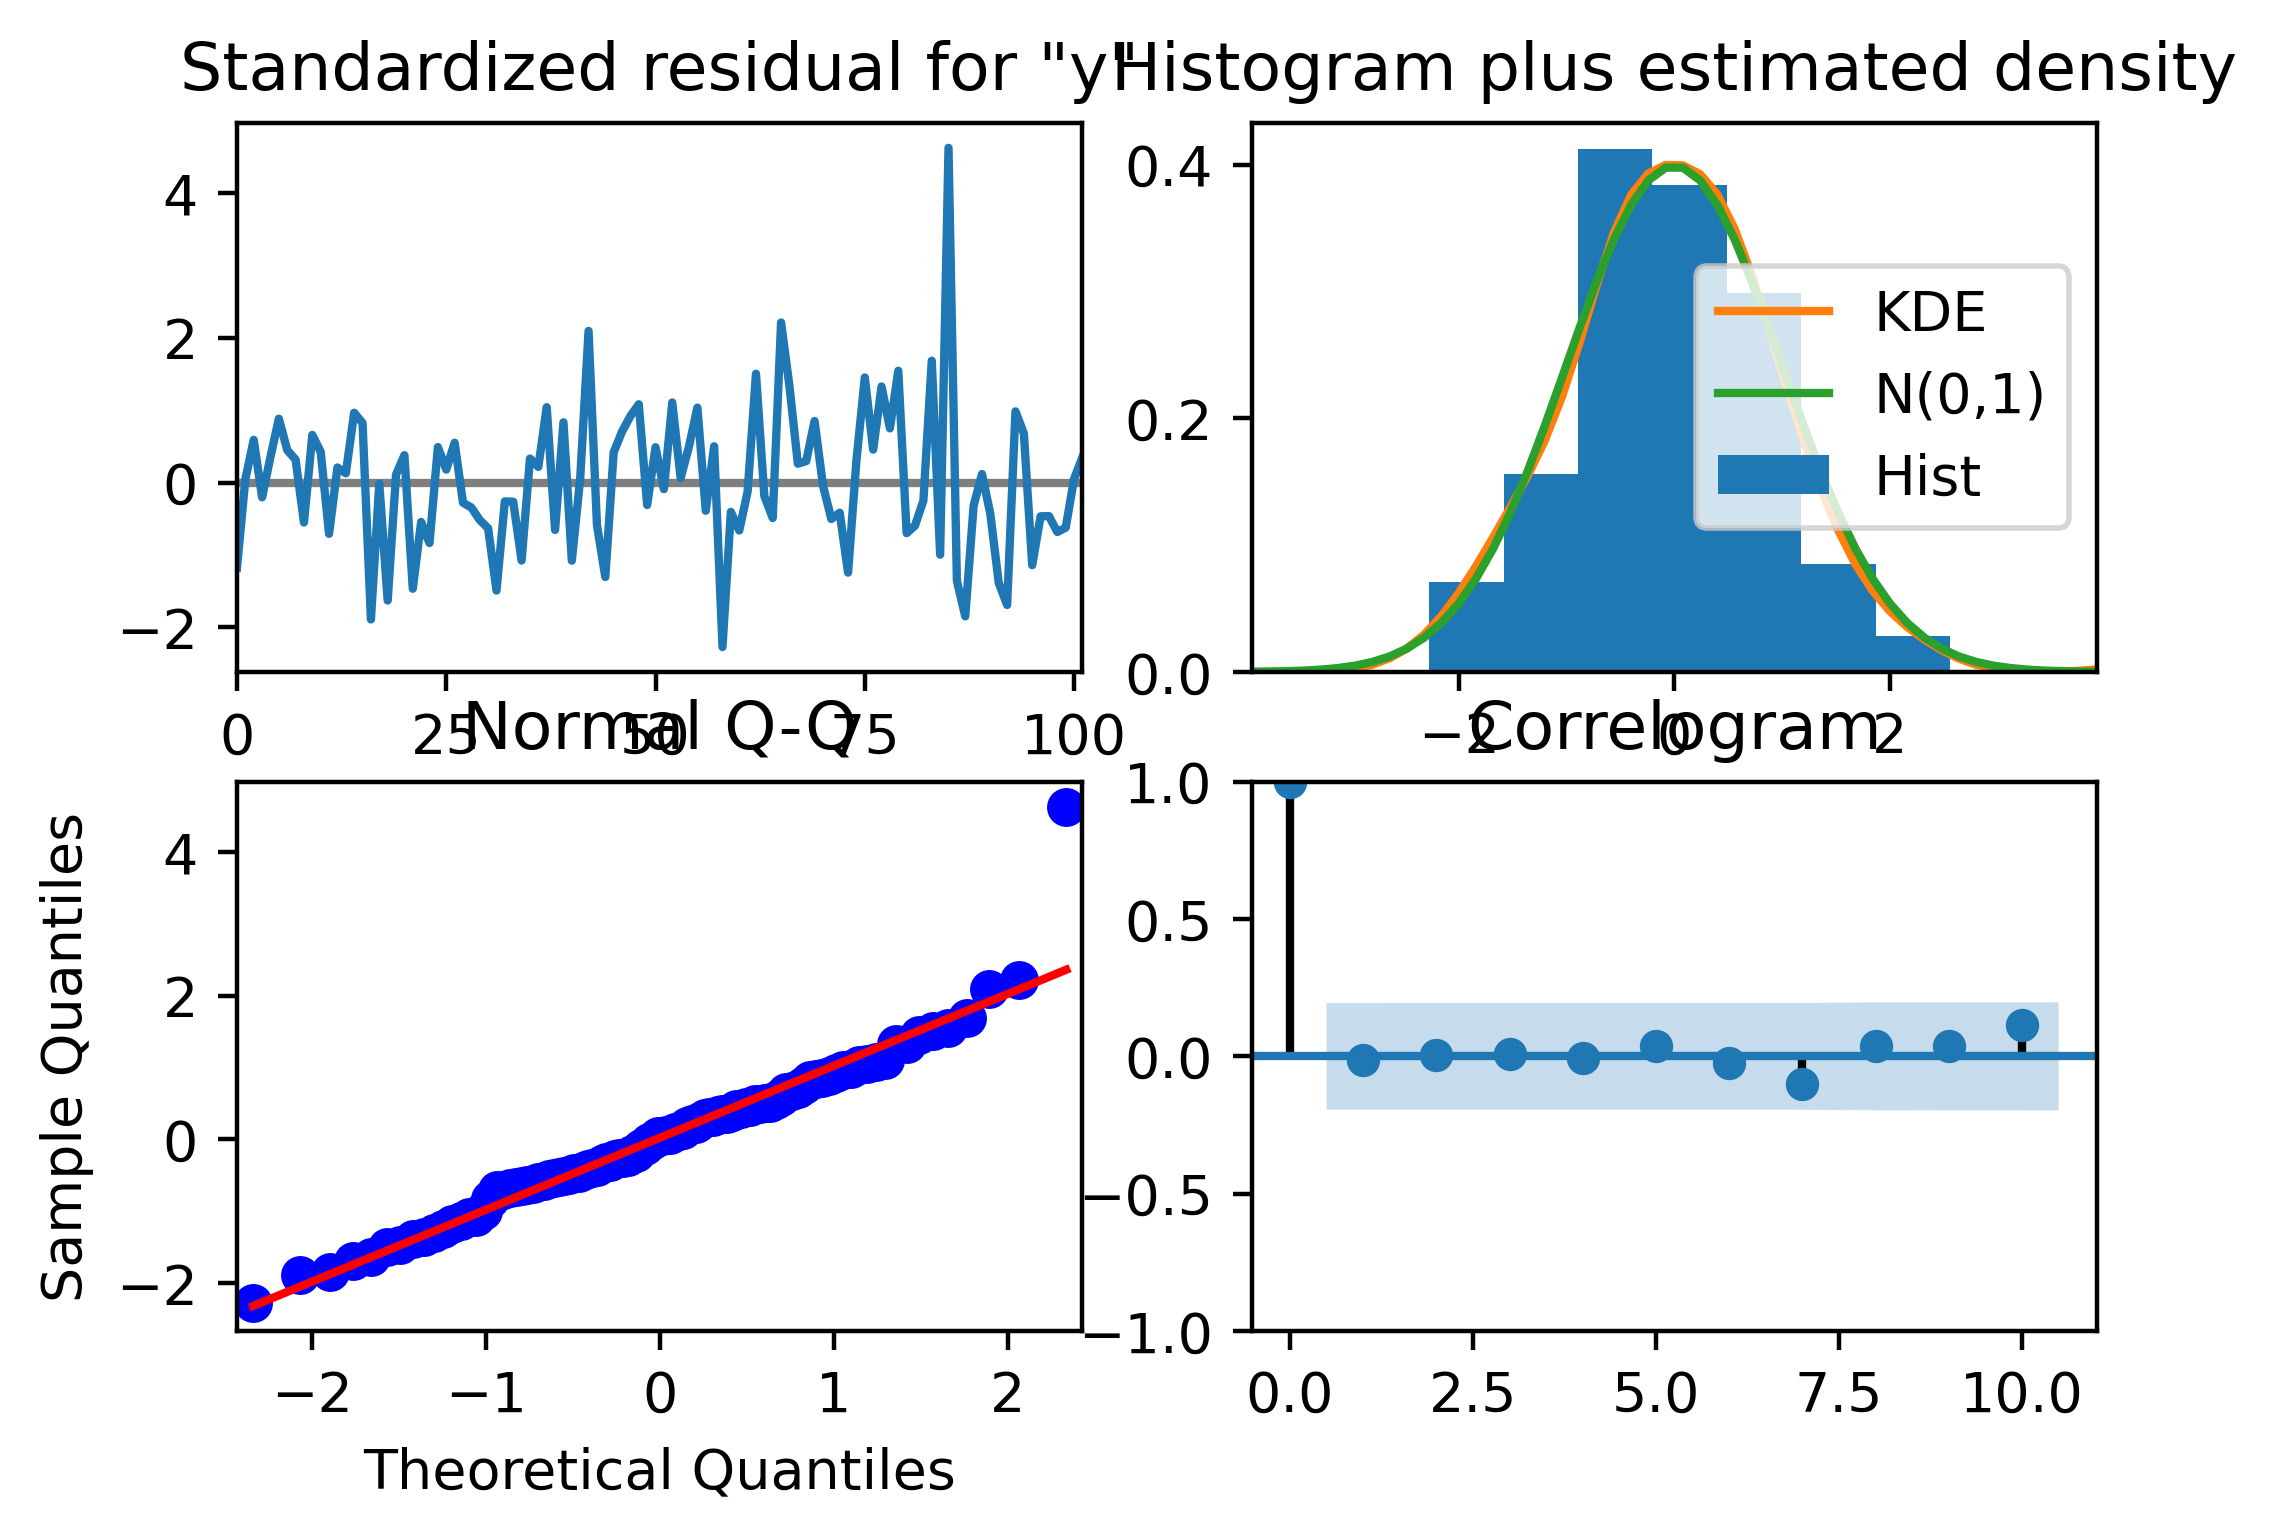

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Thu, 15 Oct 2020   AIC                            207.653
Time:                        10:25:24   BIC                            220.778
Sample:                             0   HQIC                           212.968
                                - 102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7

In [57]:
!model = SARIMAX(savings, order=(2,0,3), trend='c')
model = SARIMAX(savings, order=(1,0,2), trend='c')
results = model.fit()
results.plot_diagnostics()
plt.show()
print(results.summary())

In [58]:
df = pd.read_csv('data/candy_production.csv', index_col='date', parse_dates=True)
df.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


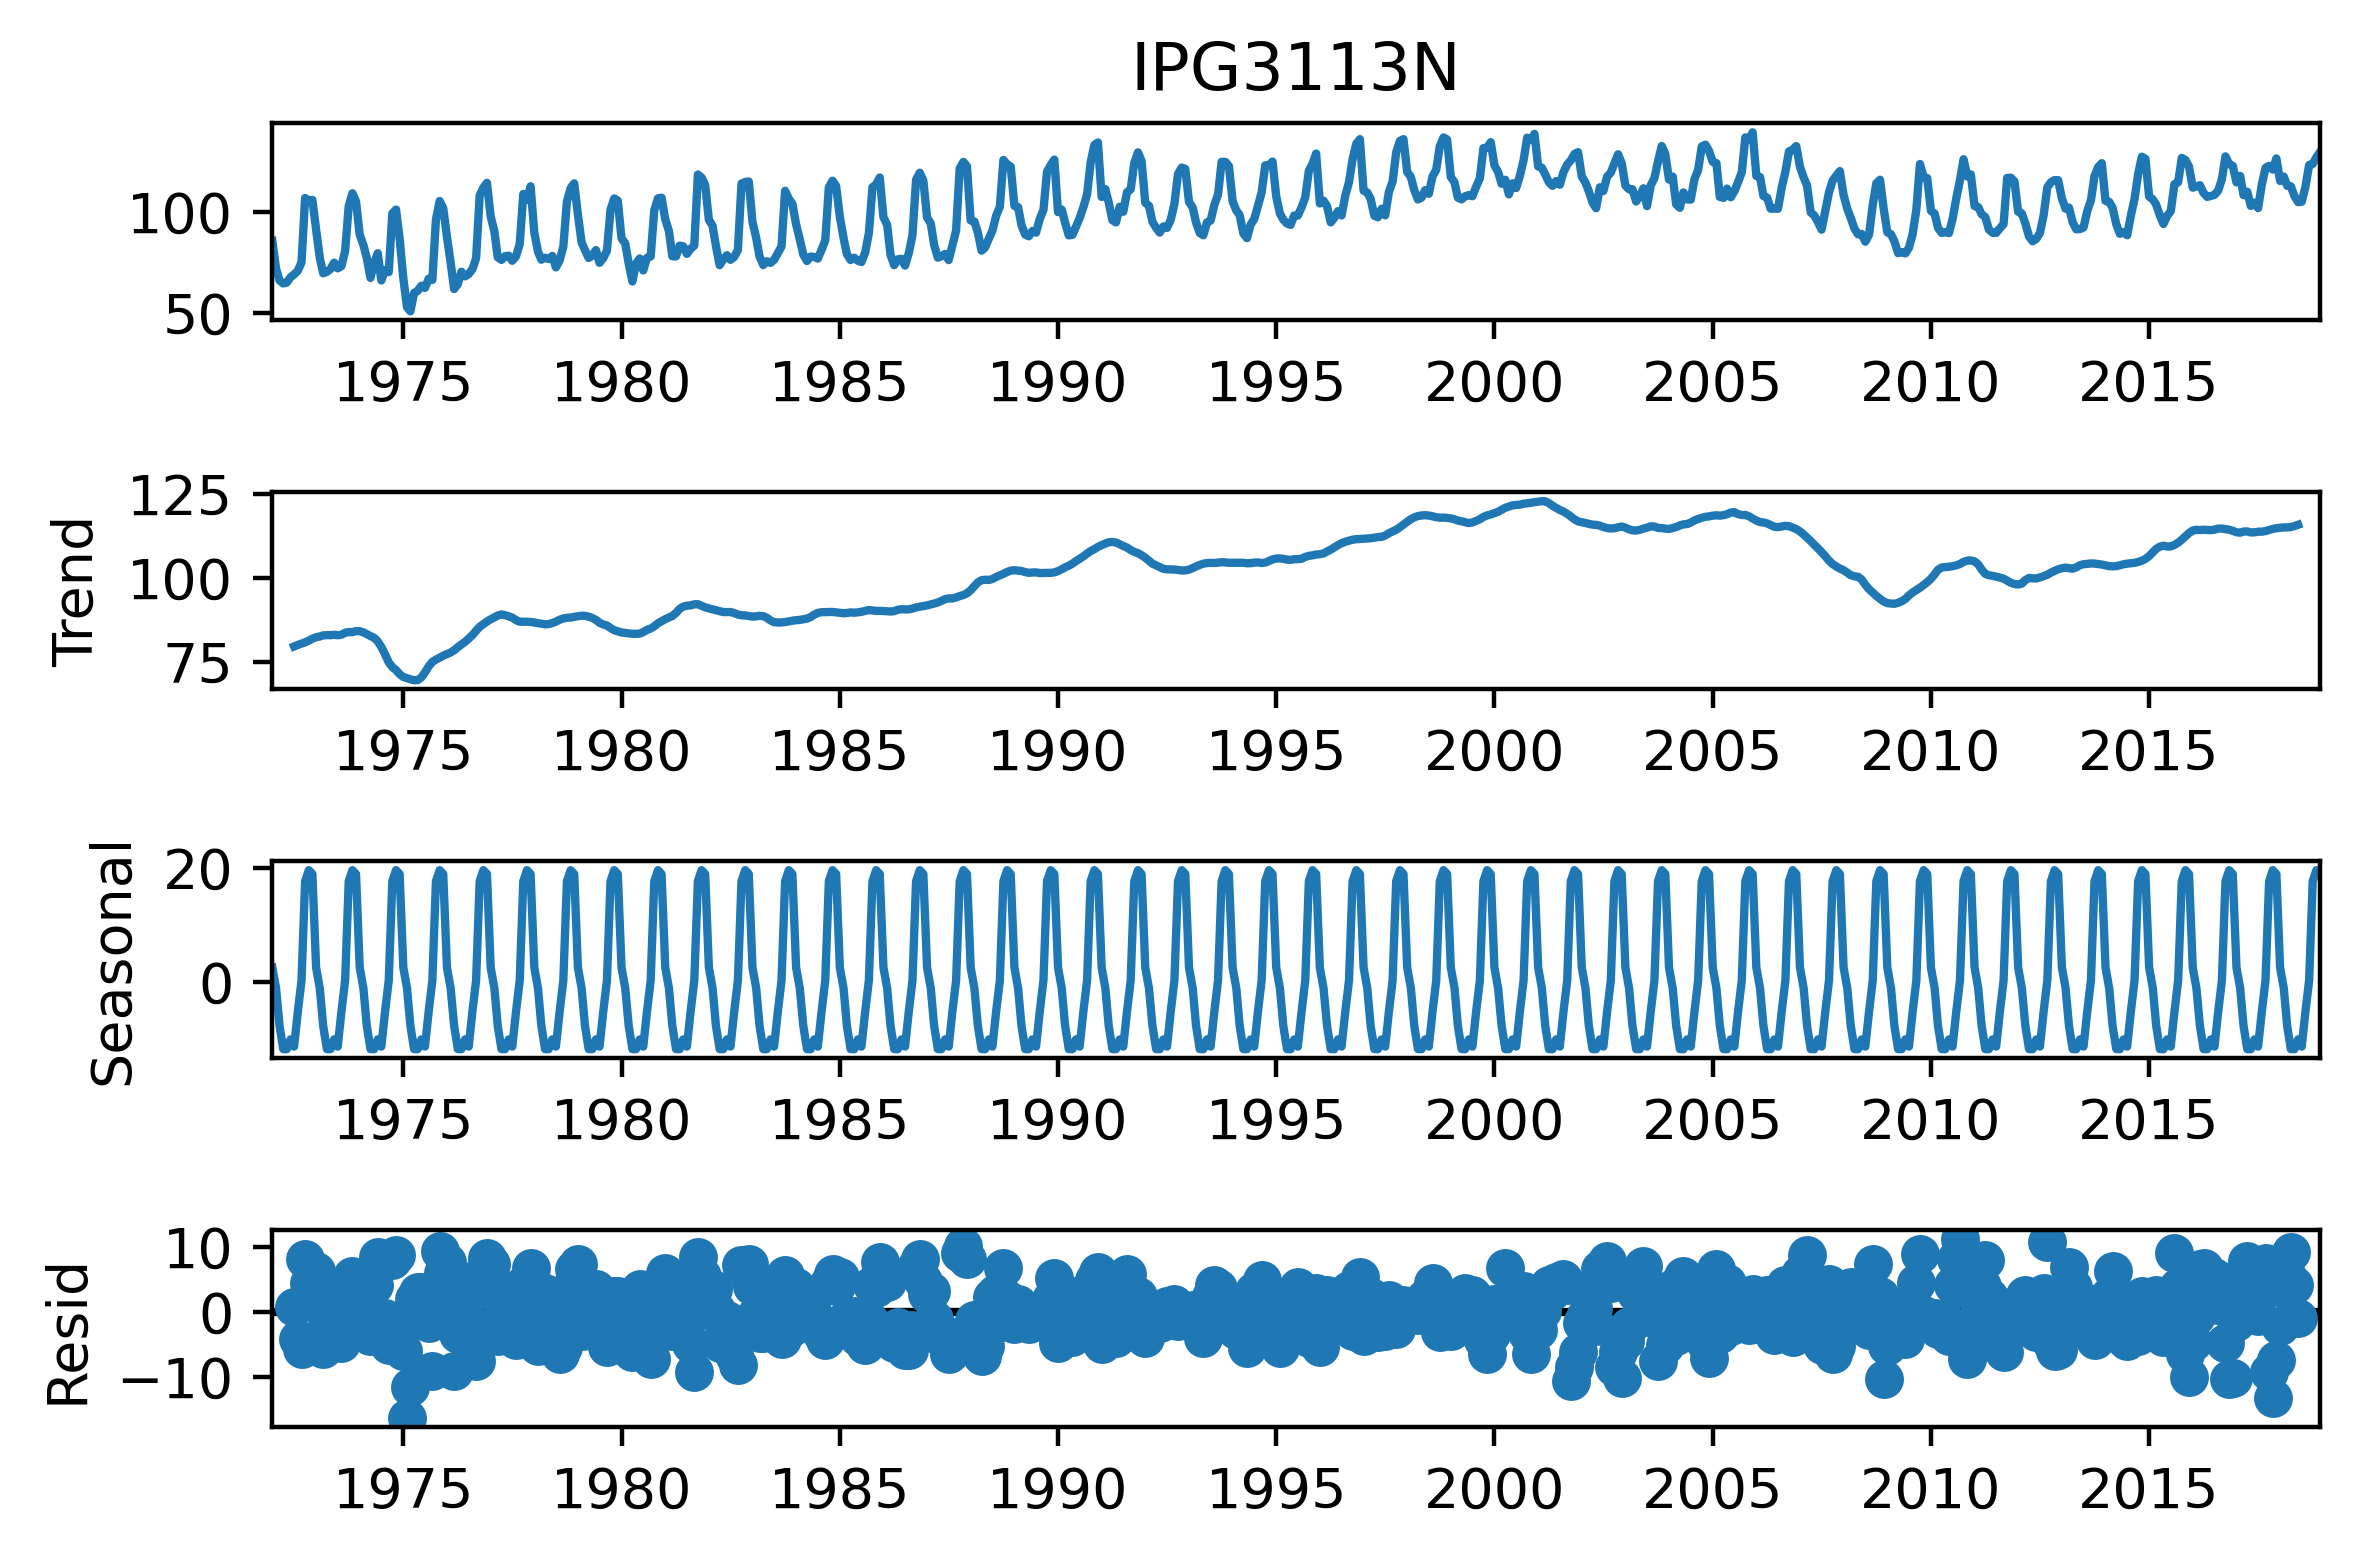

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_results = seasonal_decompose(df['IPG3113N'], freq=12)
decomp_results.plot()
plt.show()

In [72]:
df = pd.read_csv('data/USACR.csv', index_col='DATE', parse_dates=['DATE'])

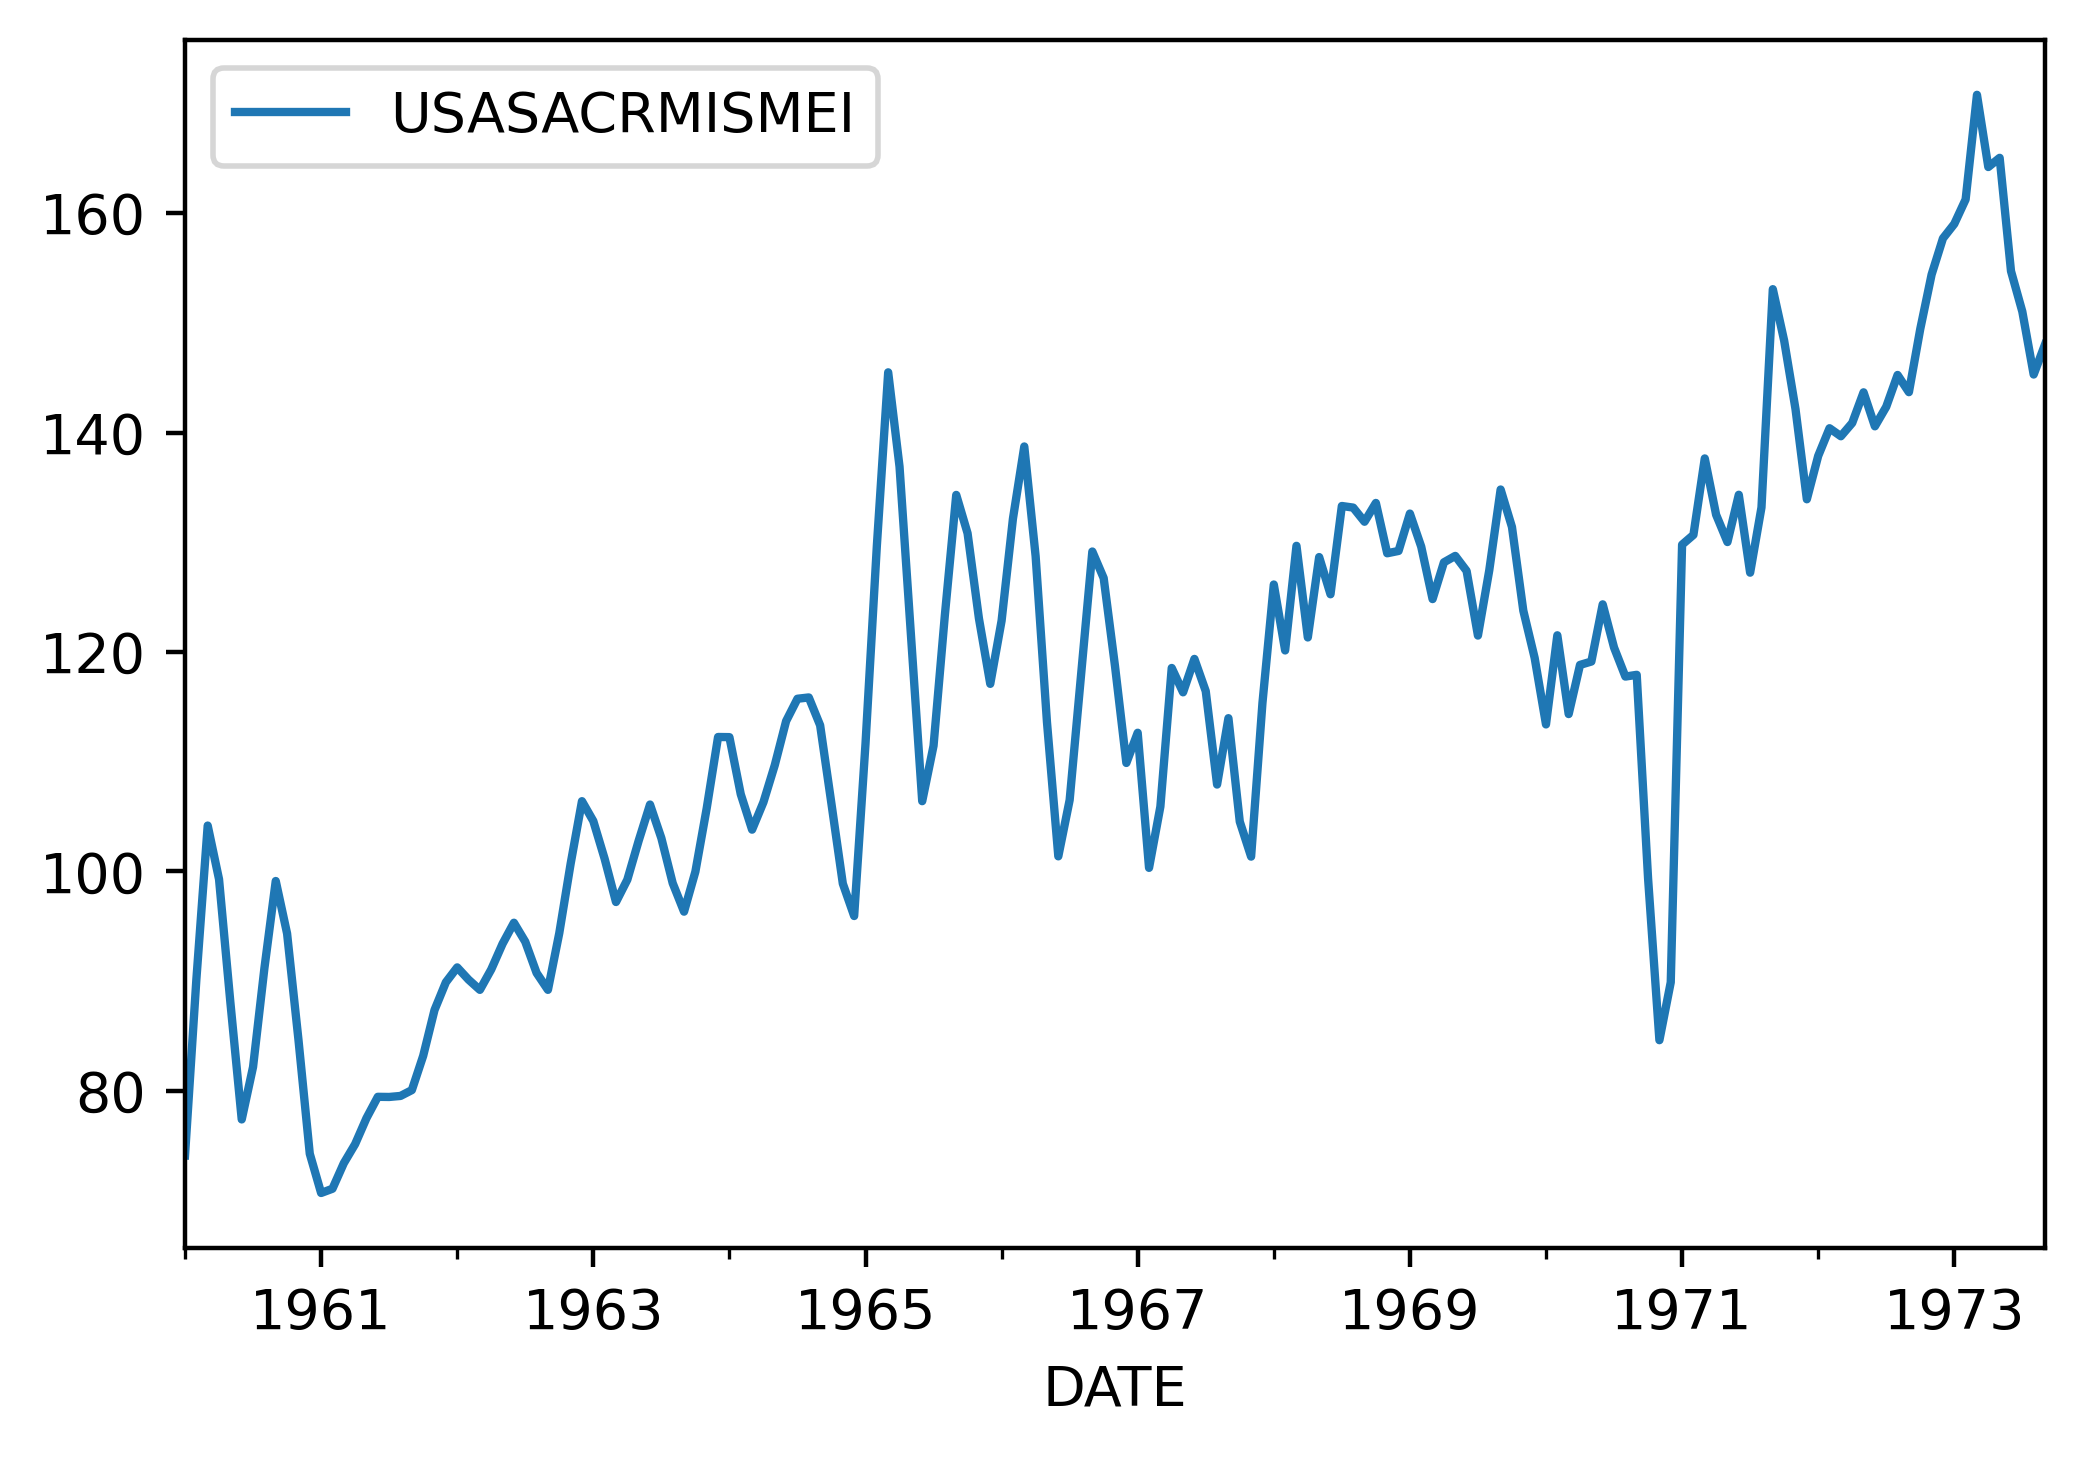

In [73]:
df.plot()

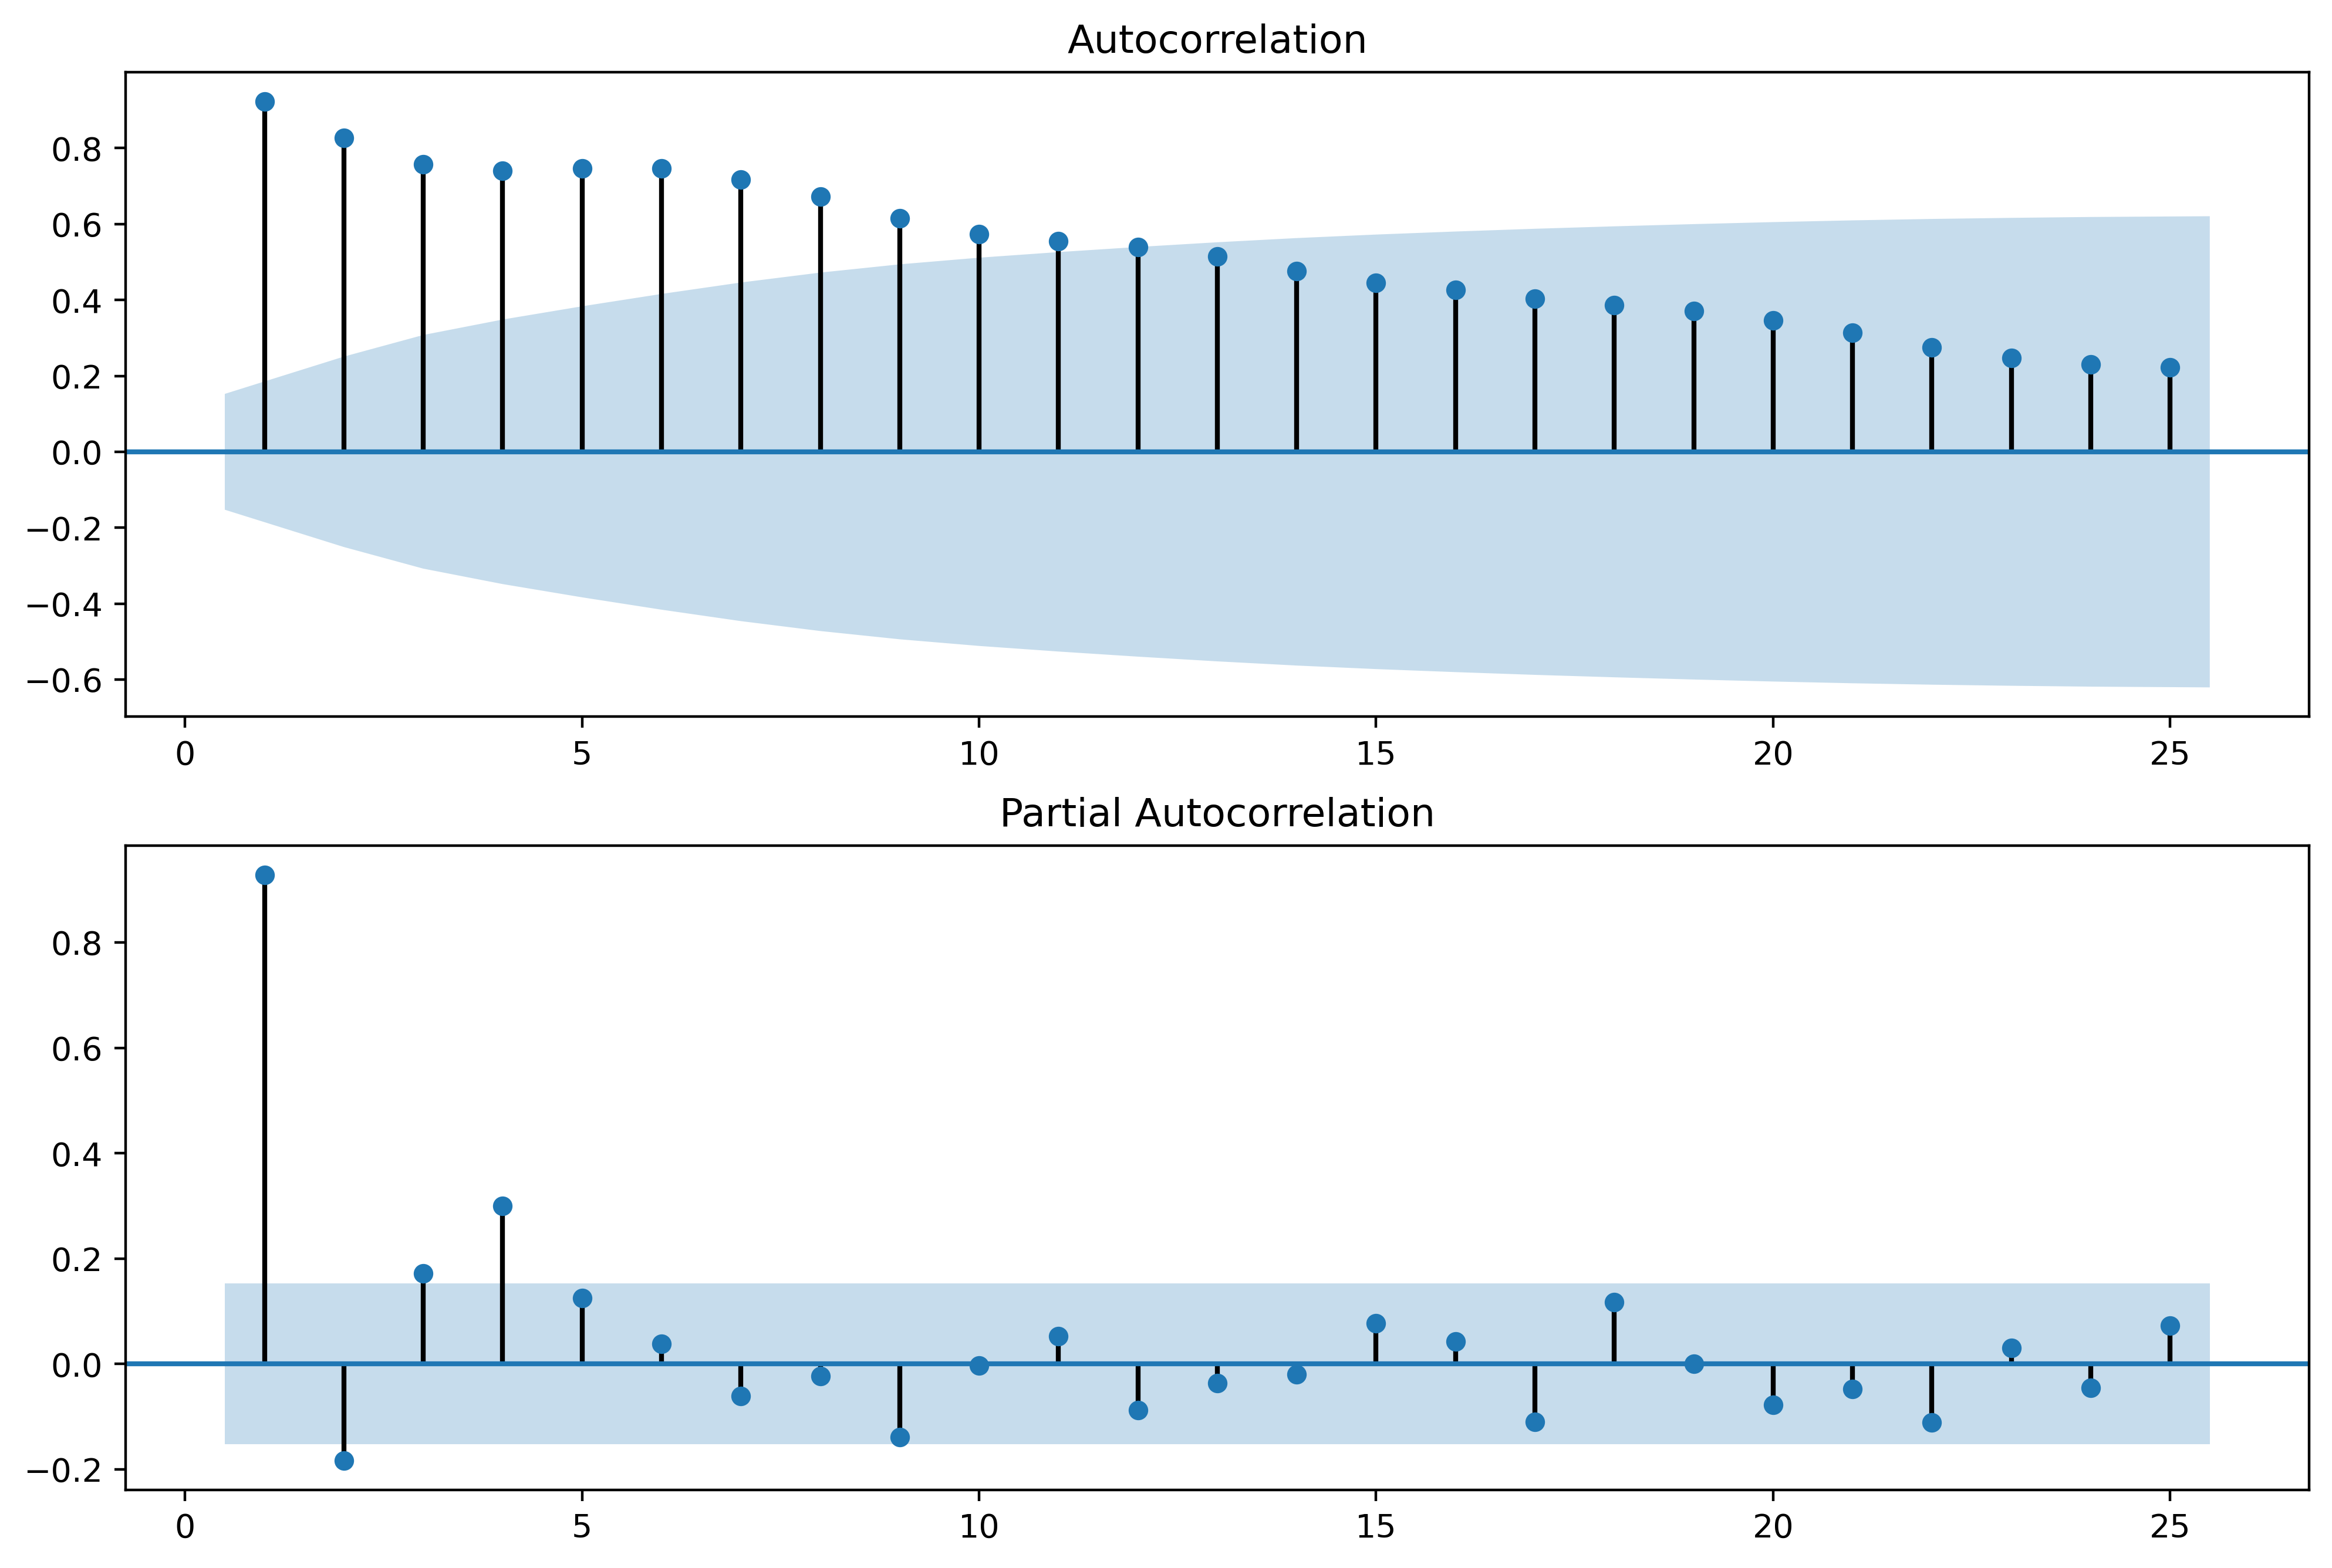

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(df, lags=25, zero=False, ax=ax1)
plot_pacf(df, lags=25, zero=False, ax=ax2)
plt.show()

In [74]:
registration = df-df.rolling(12).mean()

In [75]:
registration.dropna()

,USASACRMISMEI
DATE,
1960-12-01,-13.979748
1961-01-01,-17.273470
1961-02-01,-15.299011
1961-03-01,-10.405544
1961-04-01,-6.650635
...,...
1973-05-01,10.569621
1973-06-01,-0.933461
1973-07-01,-5.354654


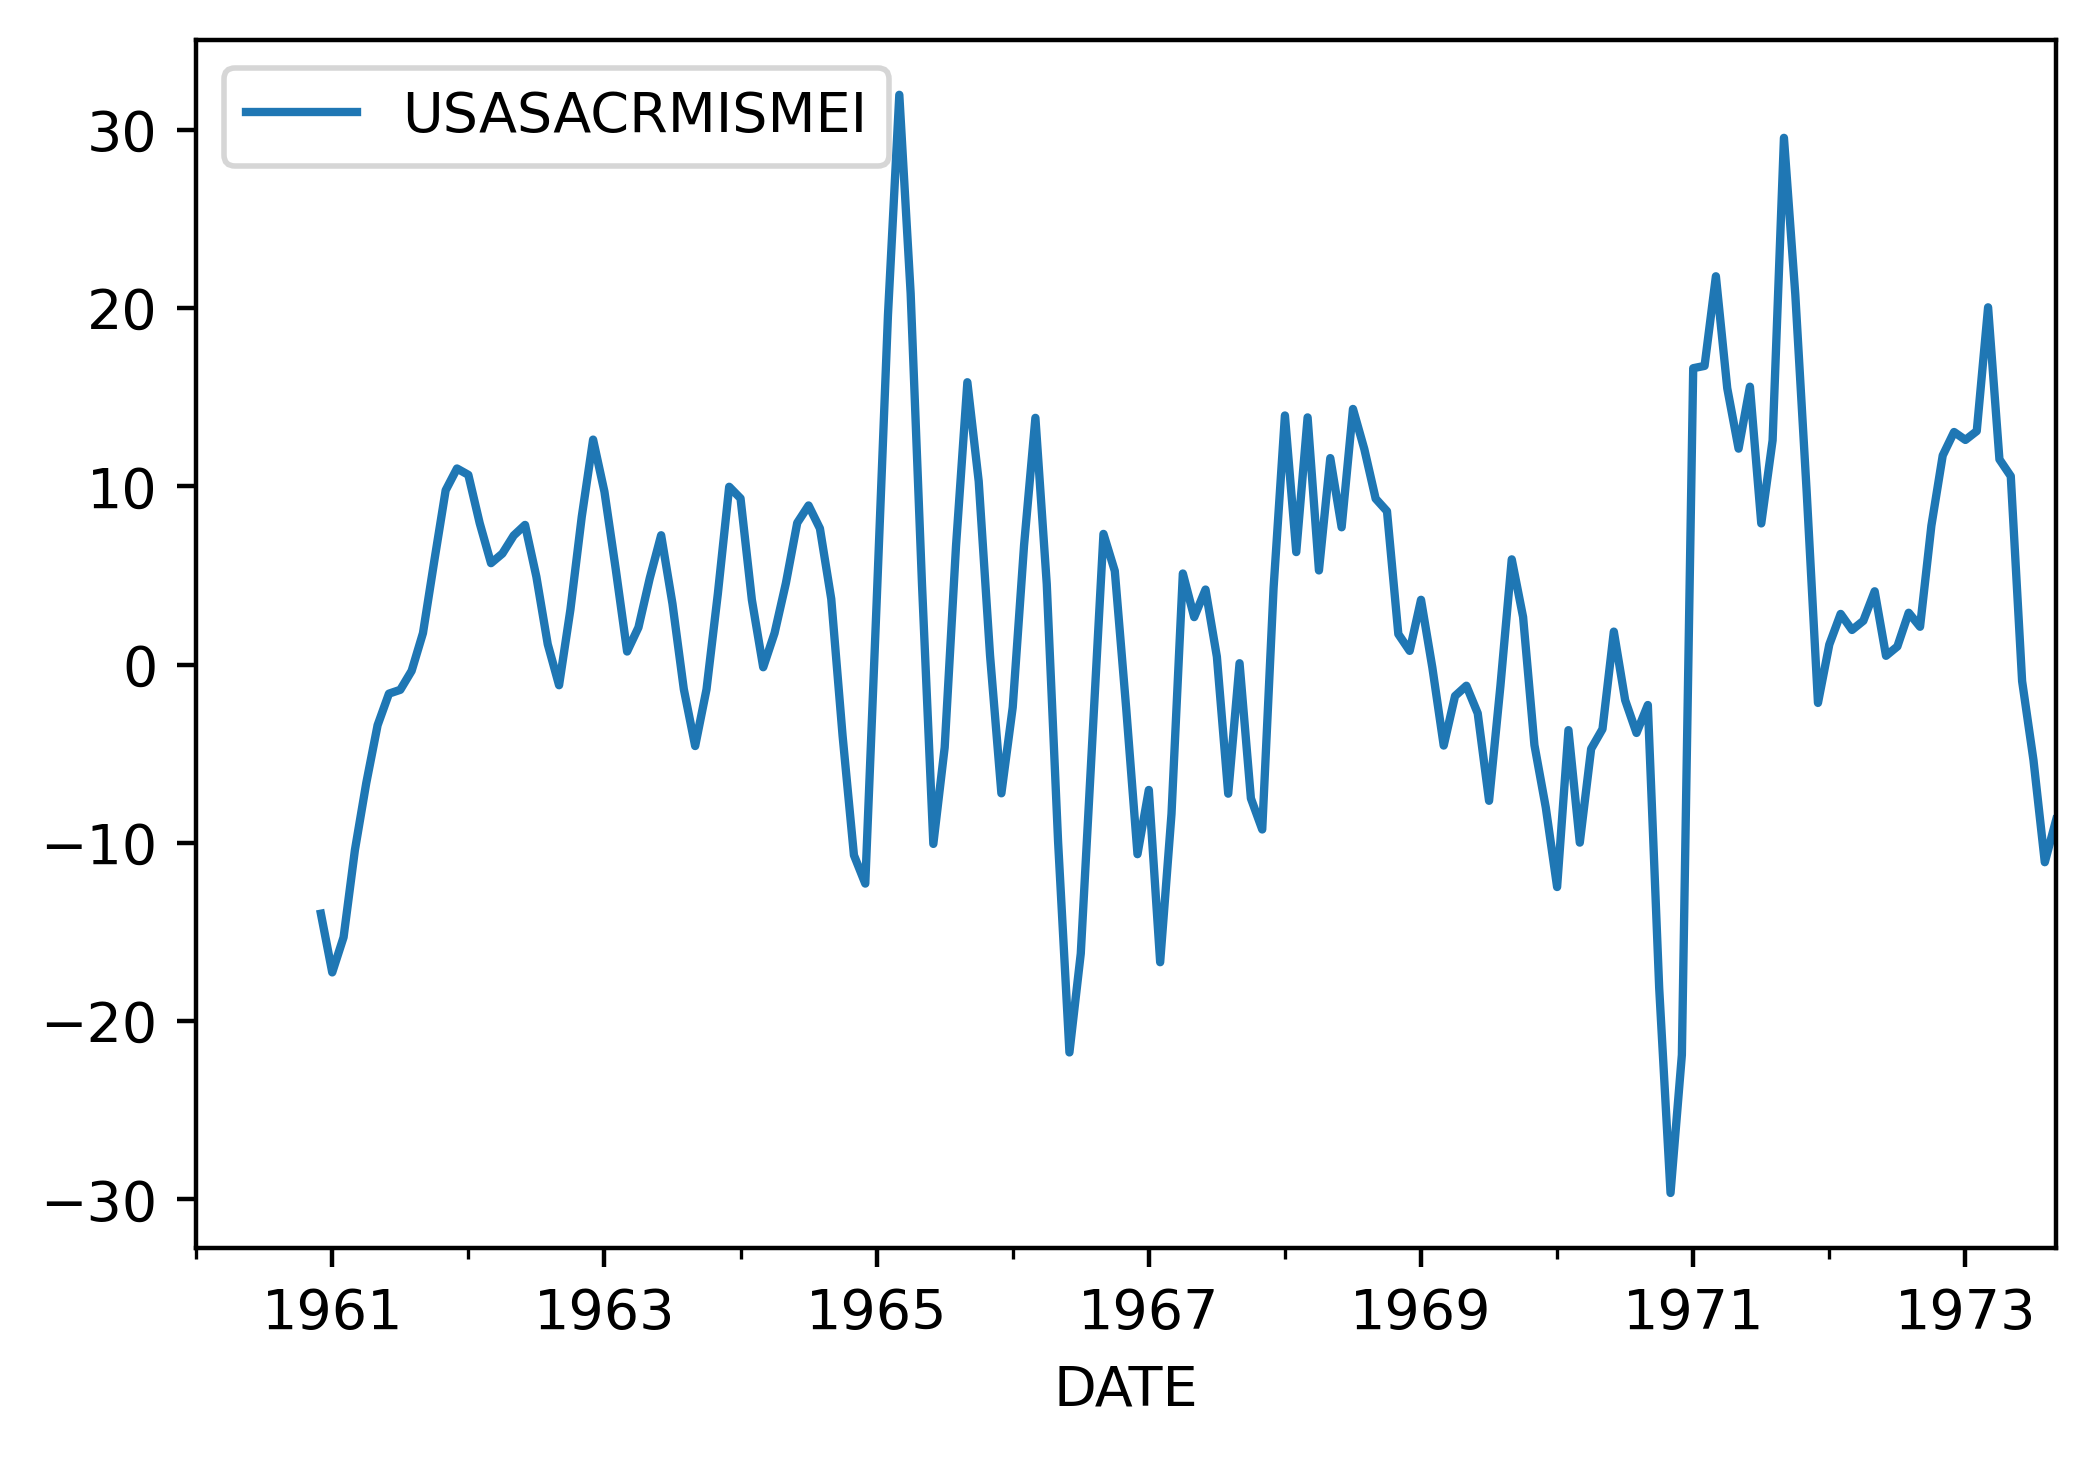

In [76]:
registration.plot()

In [86]:
milk_production = pd.read_csv('data/milk_production.csv', index_col='date', parse_dates=['date'])

In [87]:
milk_production.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


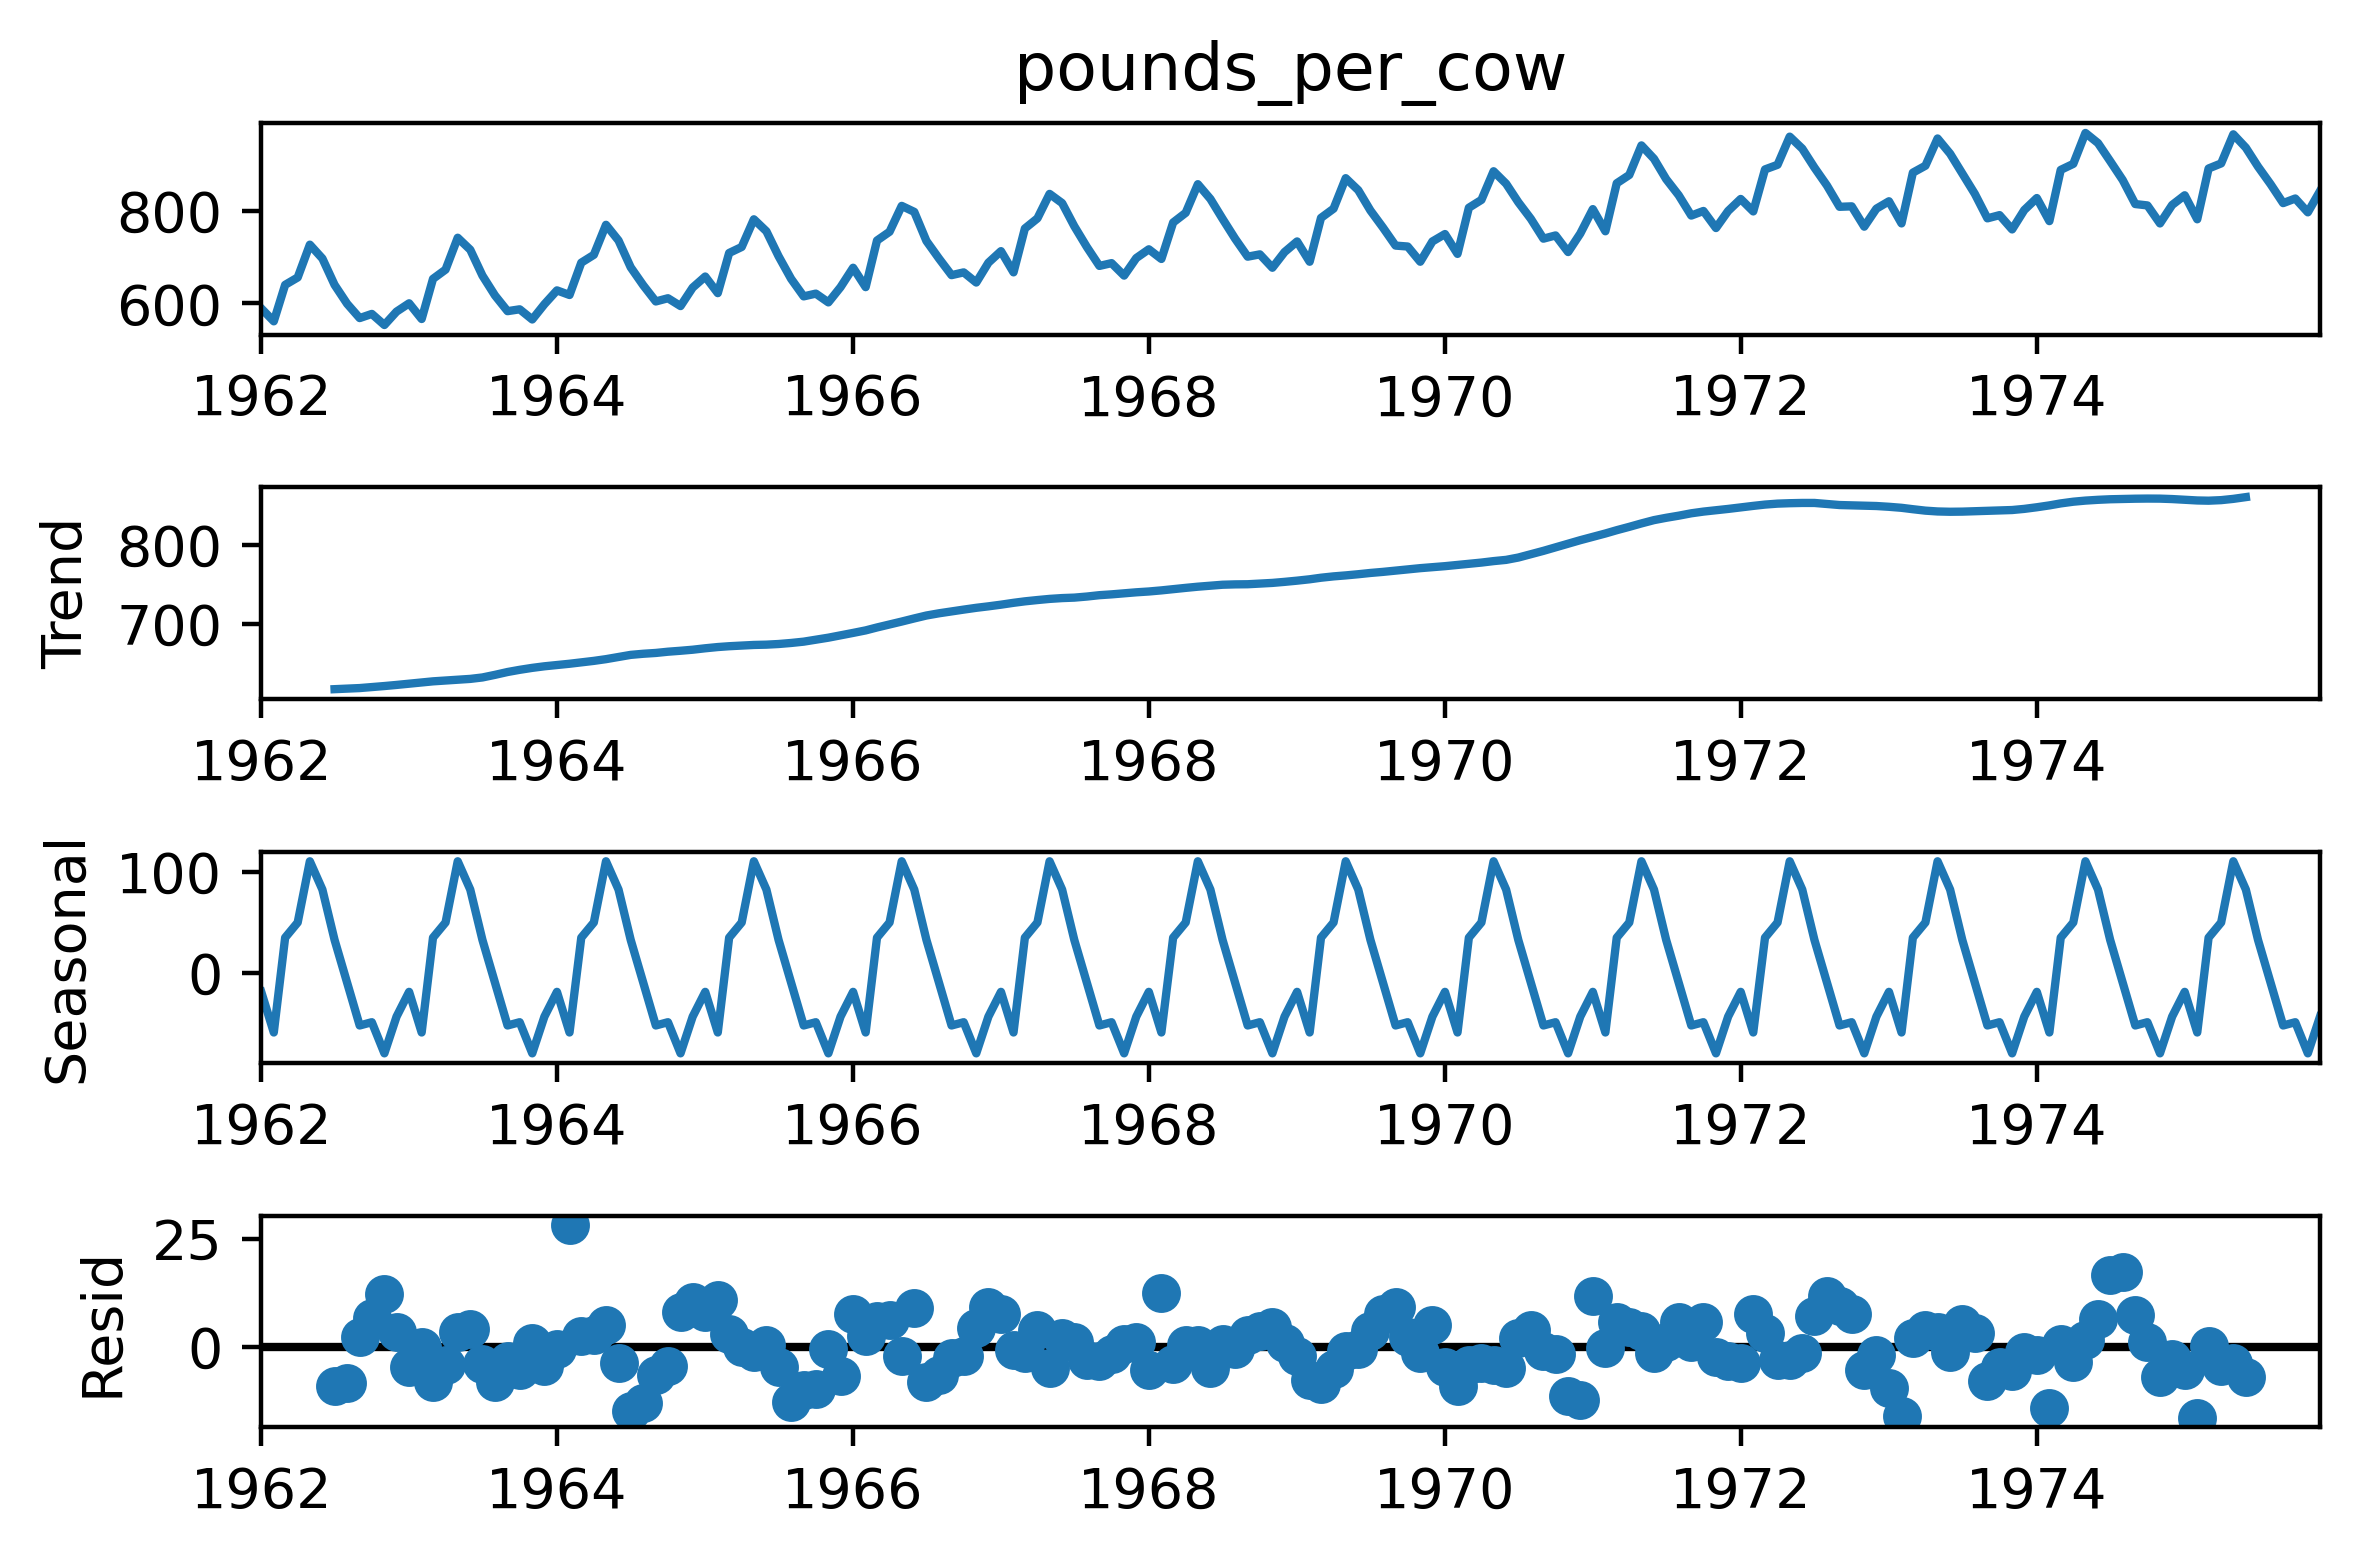

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            freq=12)

decomp.plot()
plt.show()

In [101]:
water_consumers = [[24963],
       [27380],
       [32588],
       [25511],
       [32313],
       [31858],
       [23929],
       [30452],
       [28688],
       [24936],
       [34078],
       [25601],
       [27238],
       [28126],
       [32845],
       [26001],
       [29377],
       [33275],
       [28720],
       [31159],
       [23885],
       [29233],
       [39031],
       [25918],
       [27885],
       [28695],
       [30102],
       [30110],
       [32692],
       [28224],
       [30919],
       [30229],
       [28395],
       [32274],
       [32992],
       [26956],
       [28996],
       [28154],
       [27478],
       [32720],
       [30466],
       [27618],
       [29949],
       [29821],
       [28098],
       [32021],
       [29145],
       [29428],
       [28863],
       [28687],
       [33043],
       [29092],
       [28731],
       [34249],
       [31617],
       [30542],
       [30420],
       [32422],
       [33084],
       [29167],
       [30164],
       [32655],
       [34654],
       [29570],
       [29096],
       [33523],
       [30801],
       [35274],
       [31433],
       [32584],
       [32625],
       [27569],
       [36909],
       [30822],
       [36301],
       [32327],
       [33149],
       [33027],
       [29178],
       [35109],
       [29988],
       [38742],
       [38934],
       [28986],
       [35780],
       [31676],
       [35069],
       [33238],
       [36737],
       [32407],
       [33399],
       [37719],
       [30027],
       [37644],
       [39654],
       [28707],
       [28942],
       [31080],
       [26923],
       [32836],
       [32000],
       [30802],
       [31344],
       [32409],
       [33971],
       [33584],
       [30248],
       [30469],
       [30505],
       [31112],
       [31784],
       [31682],
       [30539],
       [36502],
       [32139],
       [30369],
       [36918],
       [32316],
       [33333],
       [30016],
       [30559],
       [31478],
       [35299],
       [30442],
       [32145],
       [35360],
       [34610],
       [33873],
       [37132],
       [32695],
       [34048],
       [32256],
       [27517],
       [33454],
       [38539],
       [31775]]
water_consumers = [x.pop() for x in water_consumers]
dates = pd.date_range(start ='1983-01-01',  
         end ='1994-05-01', freq ='1M')
dic = {'dates':dates, 'water_consumers':water_consumers}
df = pd.DataFrame(dic)
df.head()

,dates,water_consumers
0,1983-01-31,24963
1,1983-02-28,27380
2,1983-03-31,32588
3,1983-04-30,25511
4,1983-05-31,32313


In [103]:
df.set_index('dates', inplace=True)

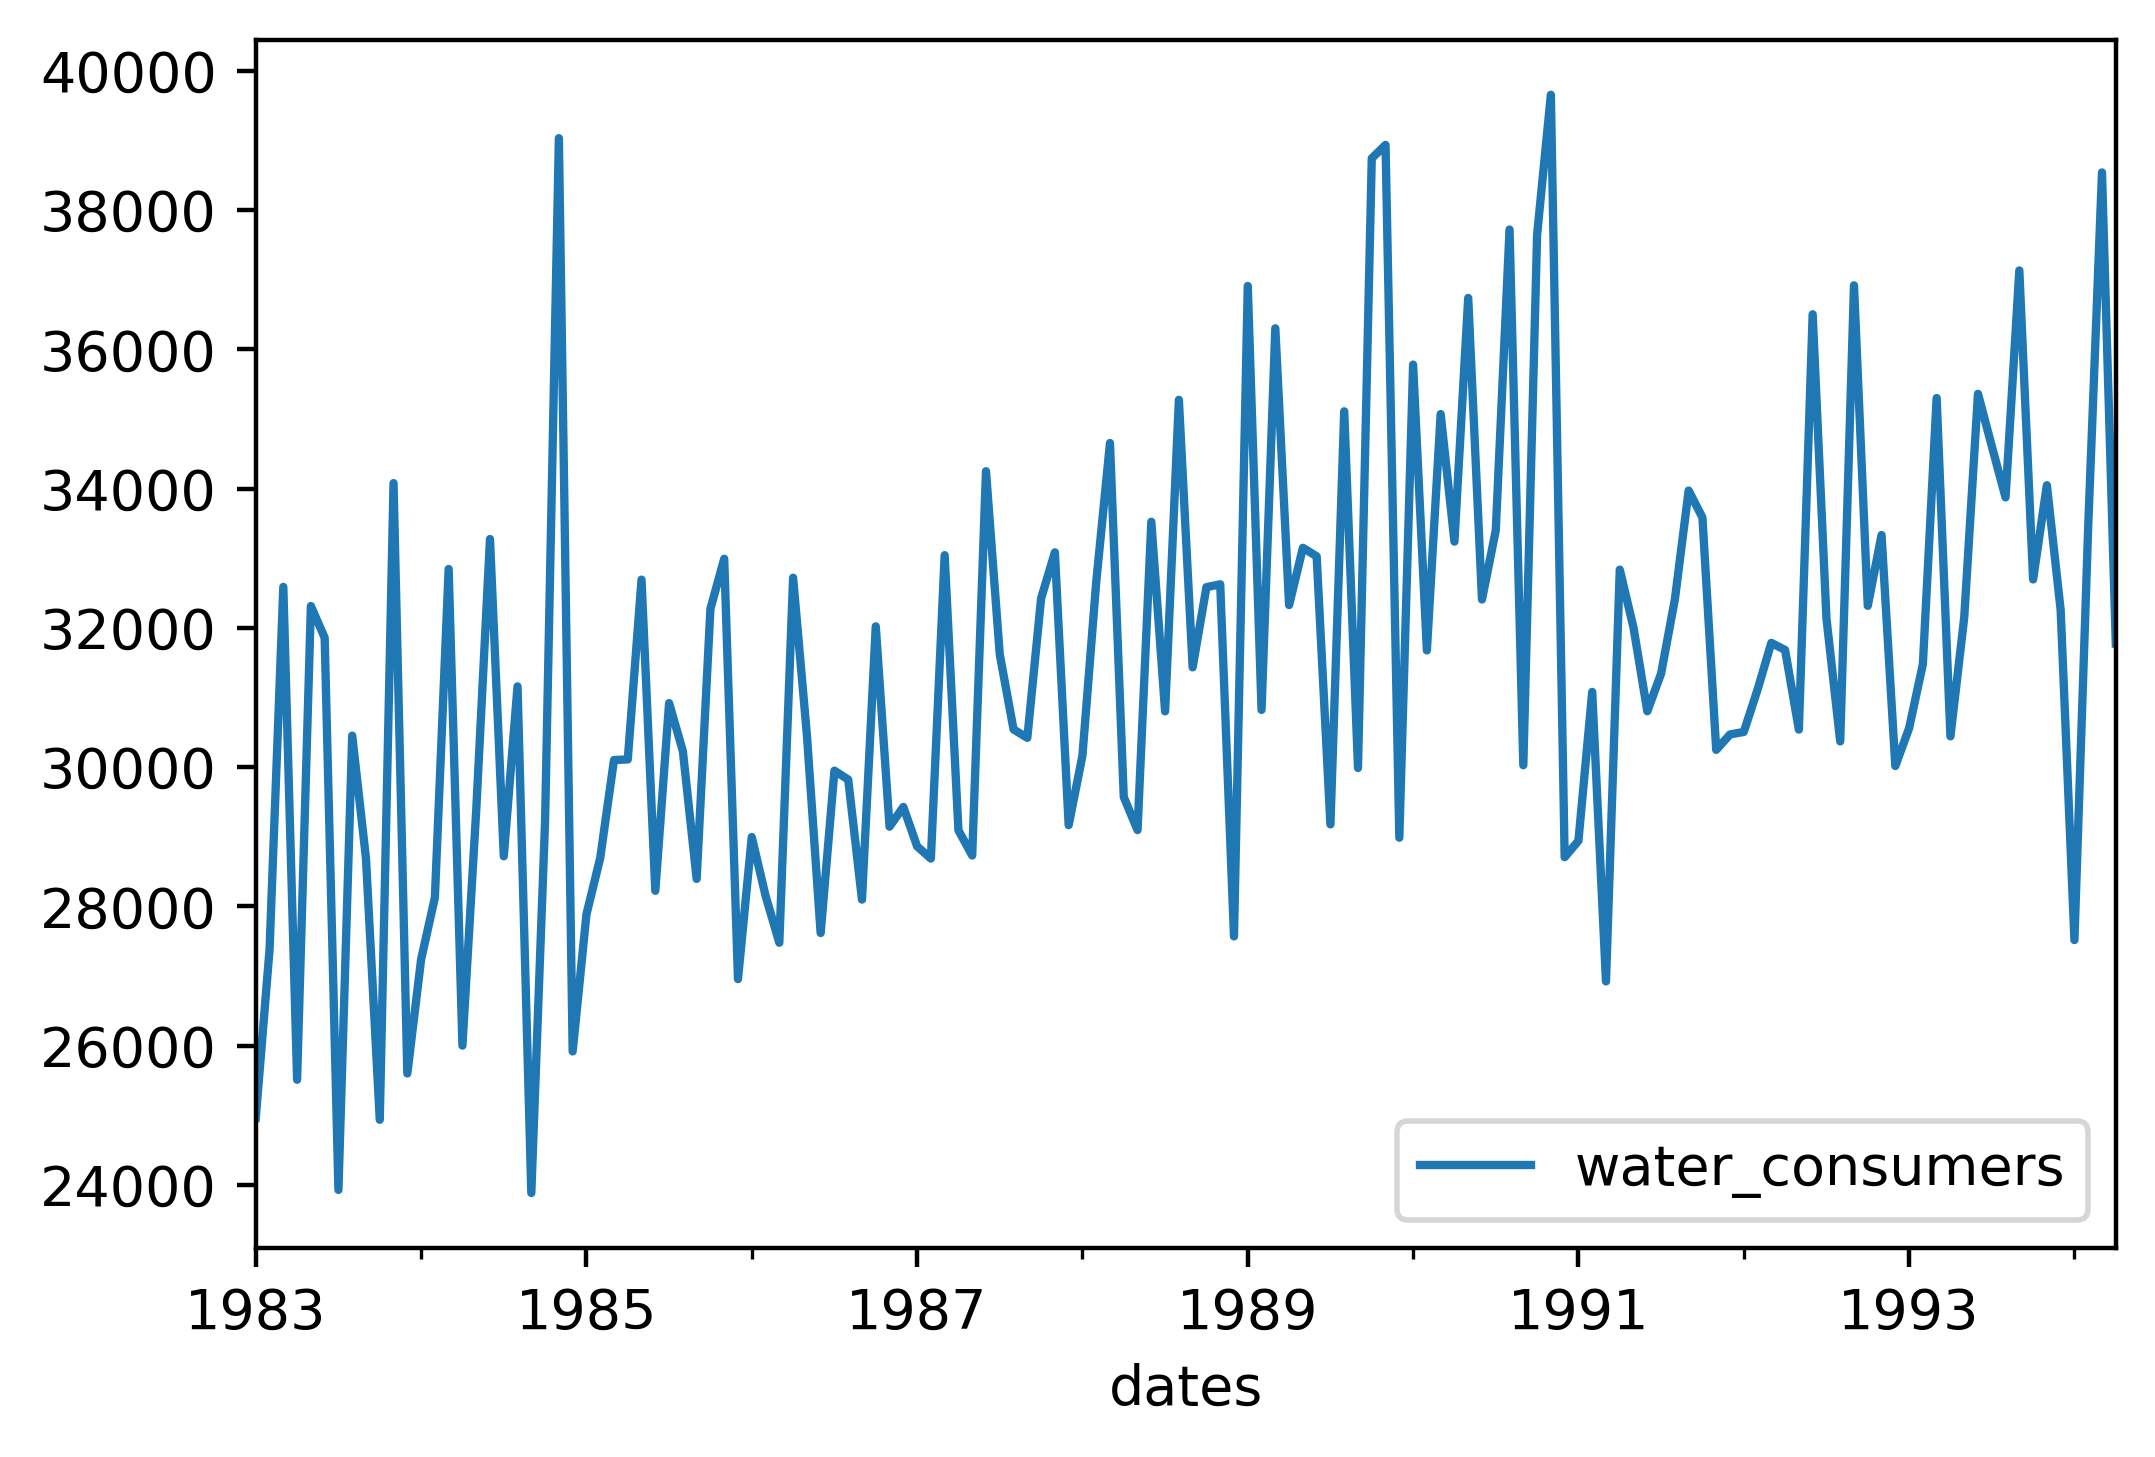

In [106]:
df.plot()

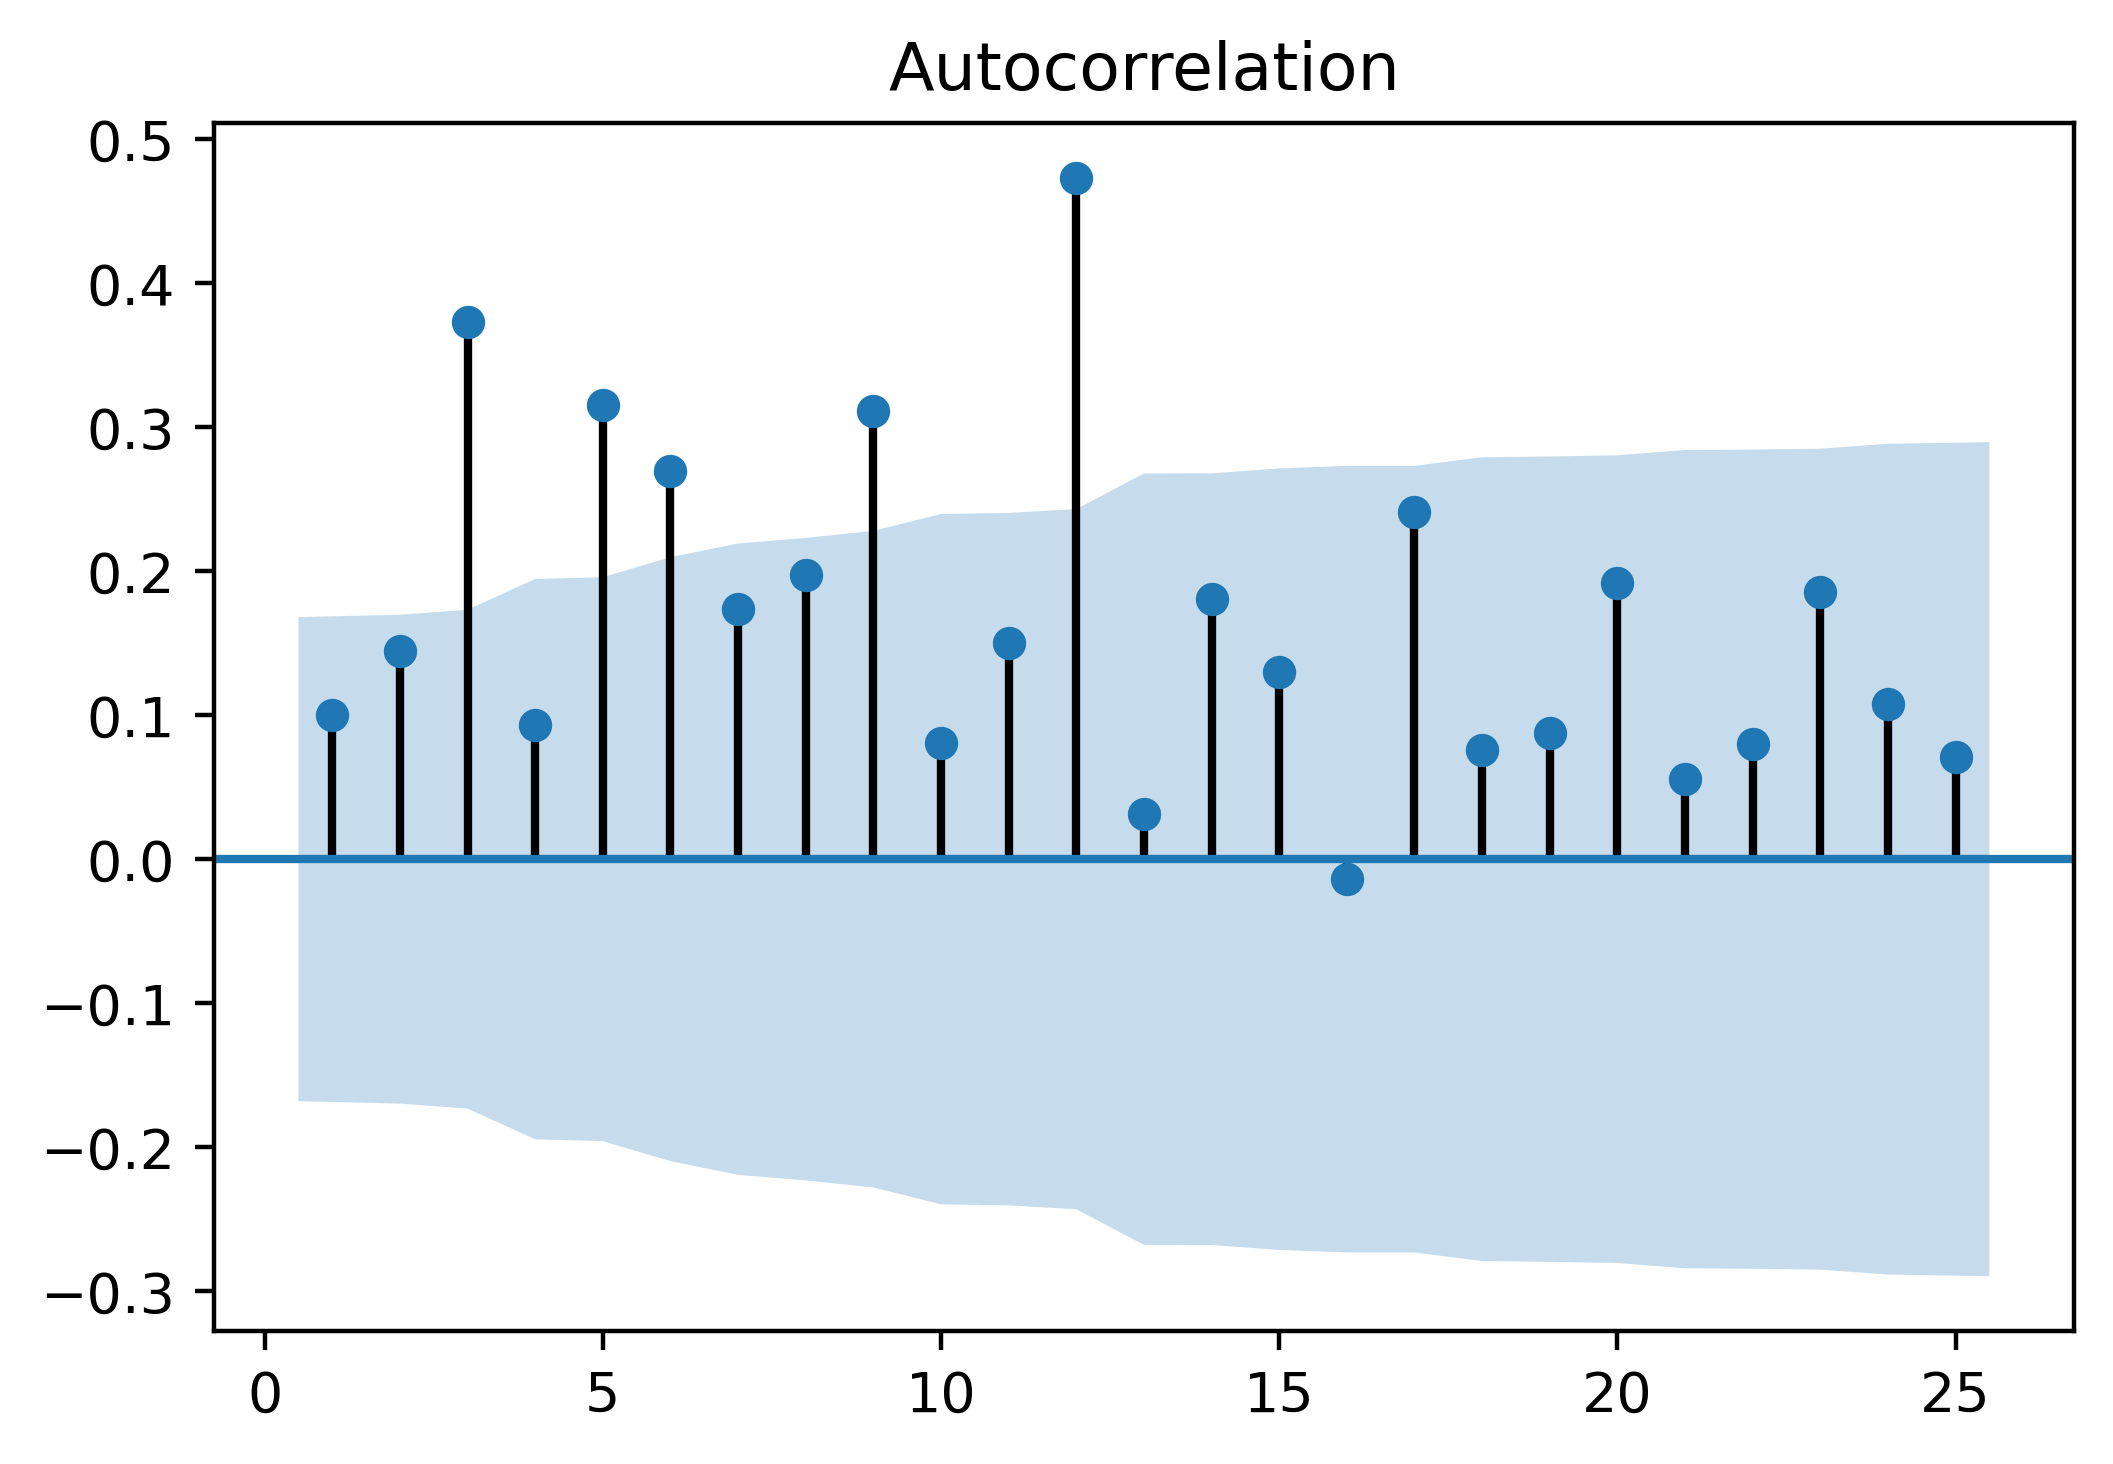

In [104]:
fig, ax1 = plt.subplots()
plot_acf(df['water_consumers'], lags=25, zero=False,  ax=ax1)
plt.show()

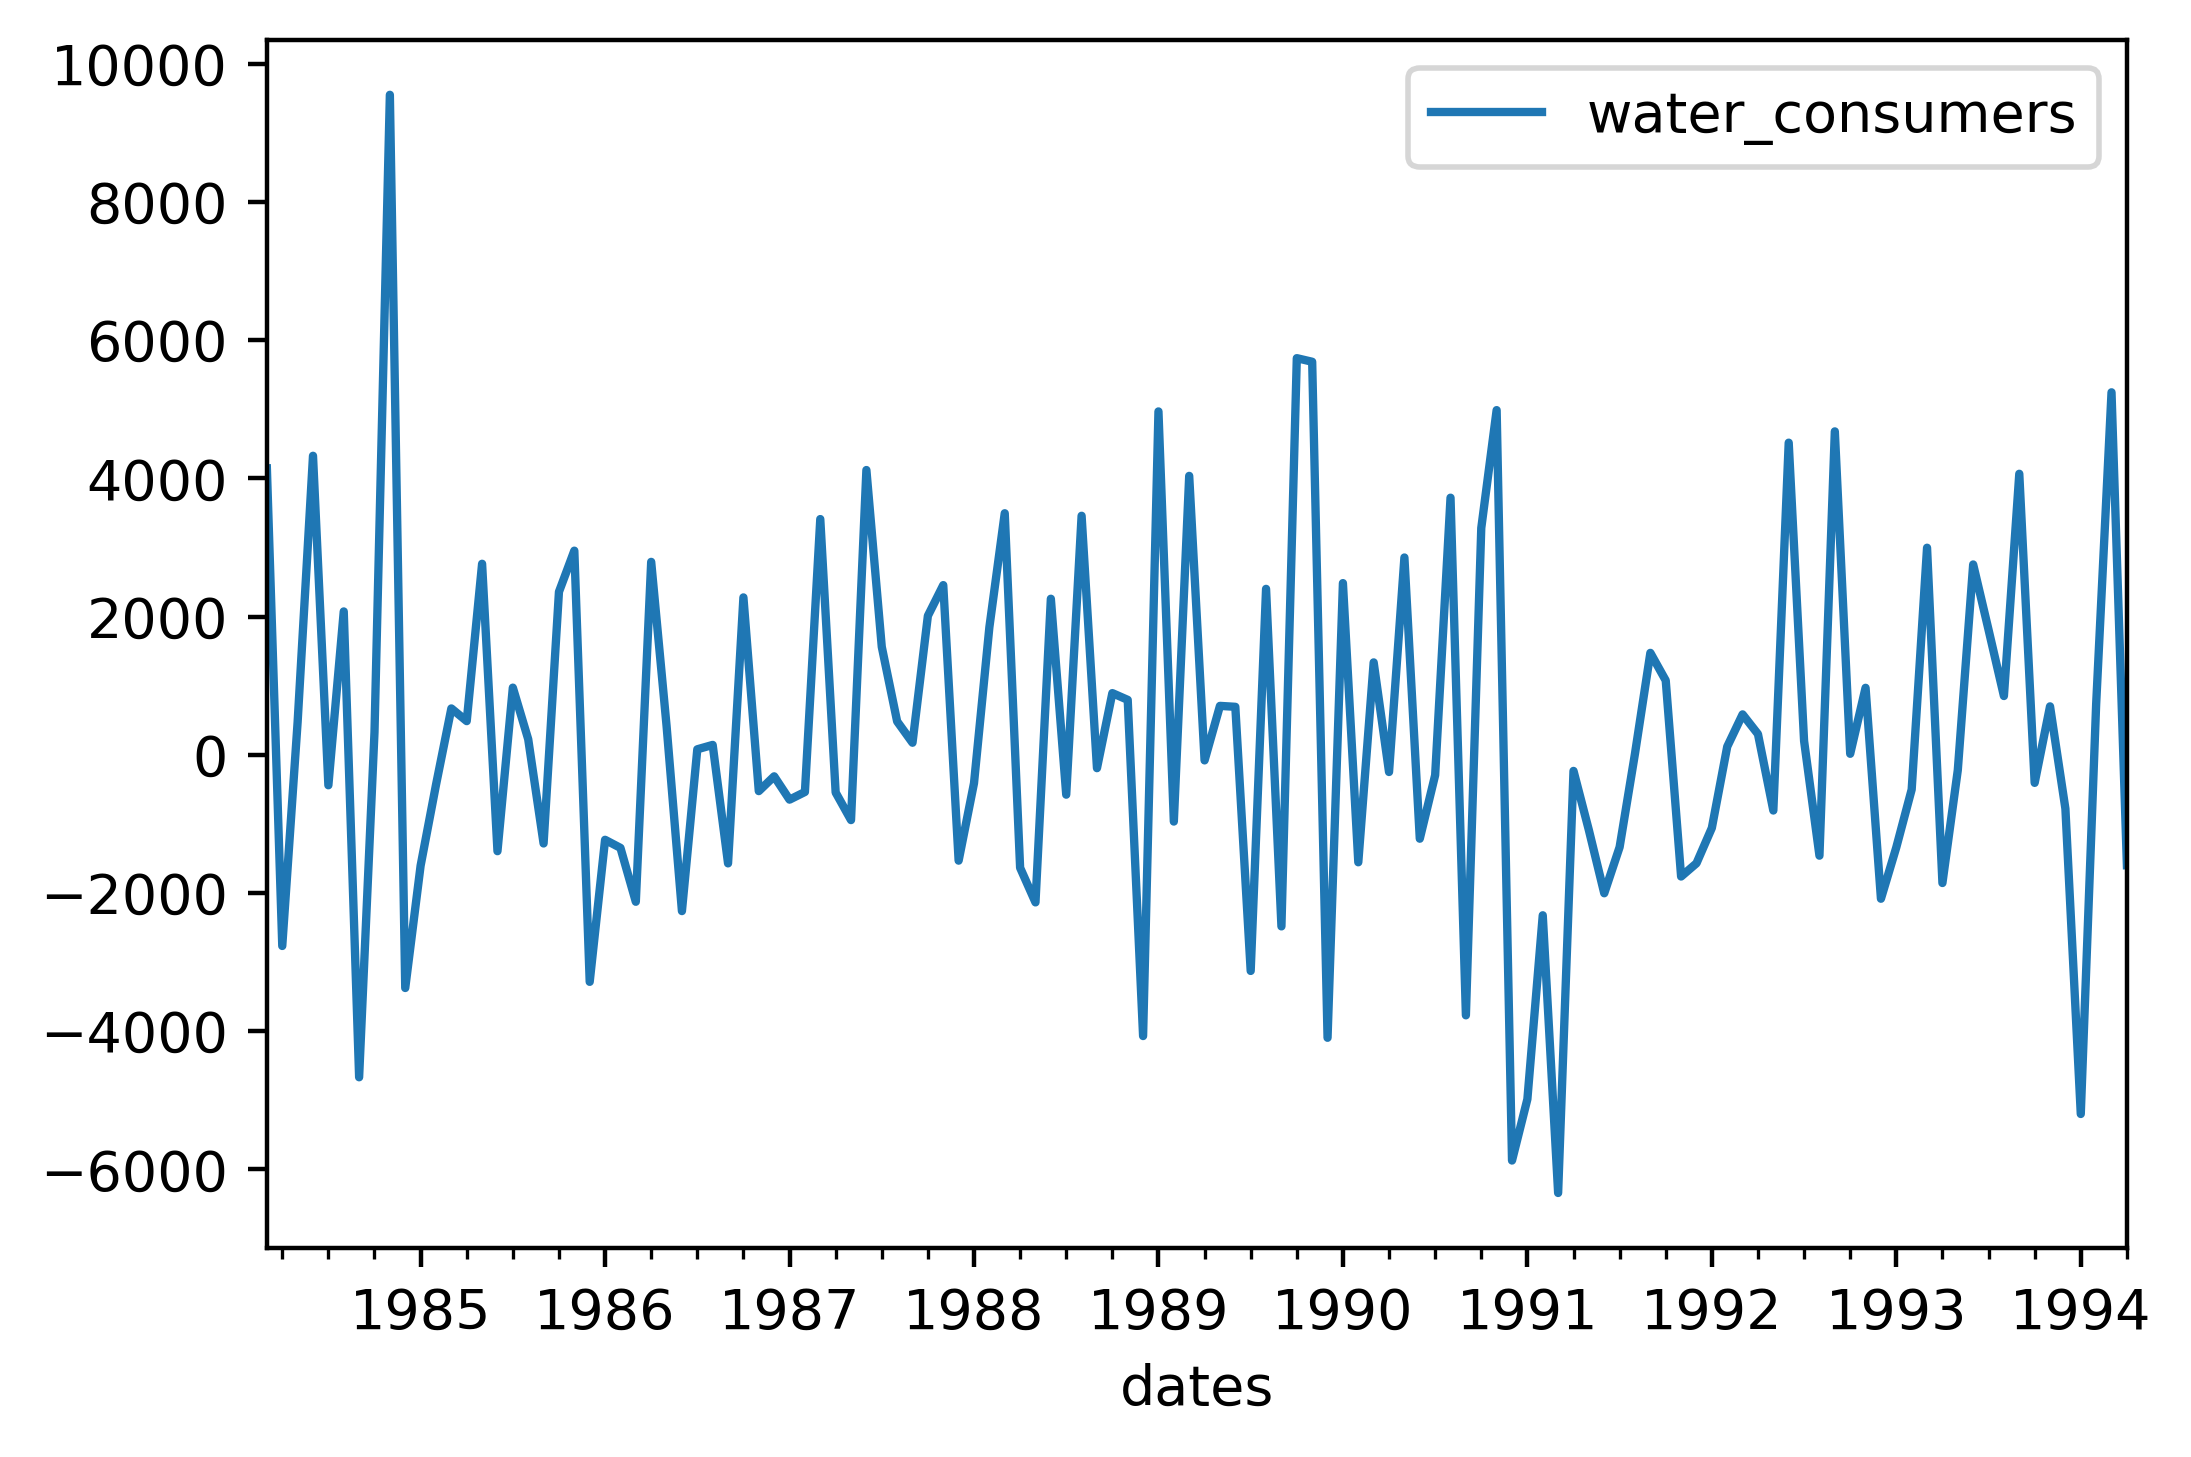

In [107]:
df2 = df - df.rolling(15).mean()
df2 = df2.dropna()
df2.plot()

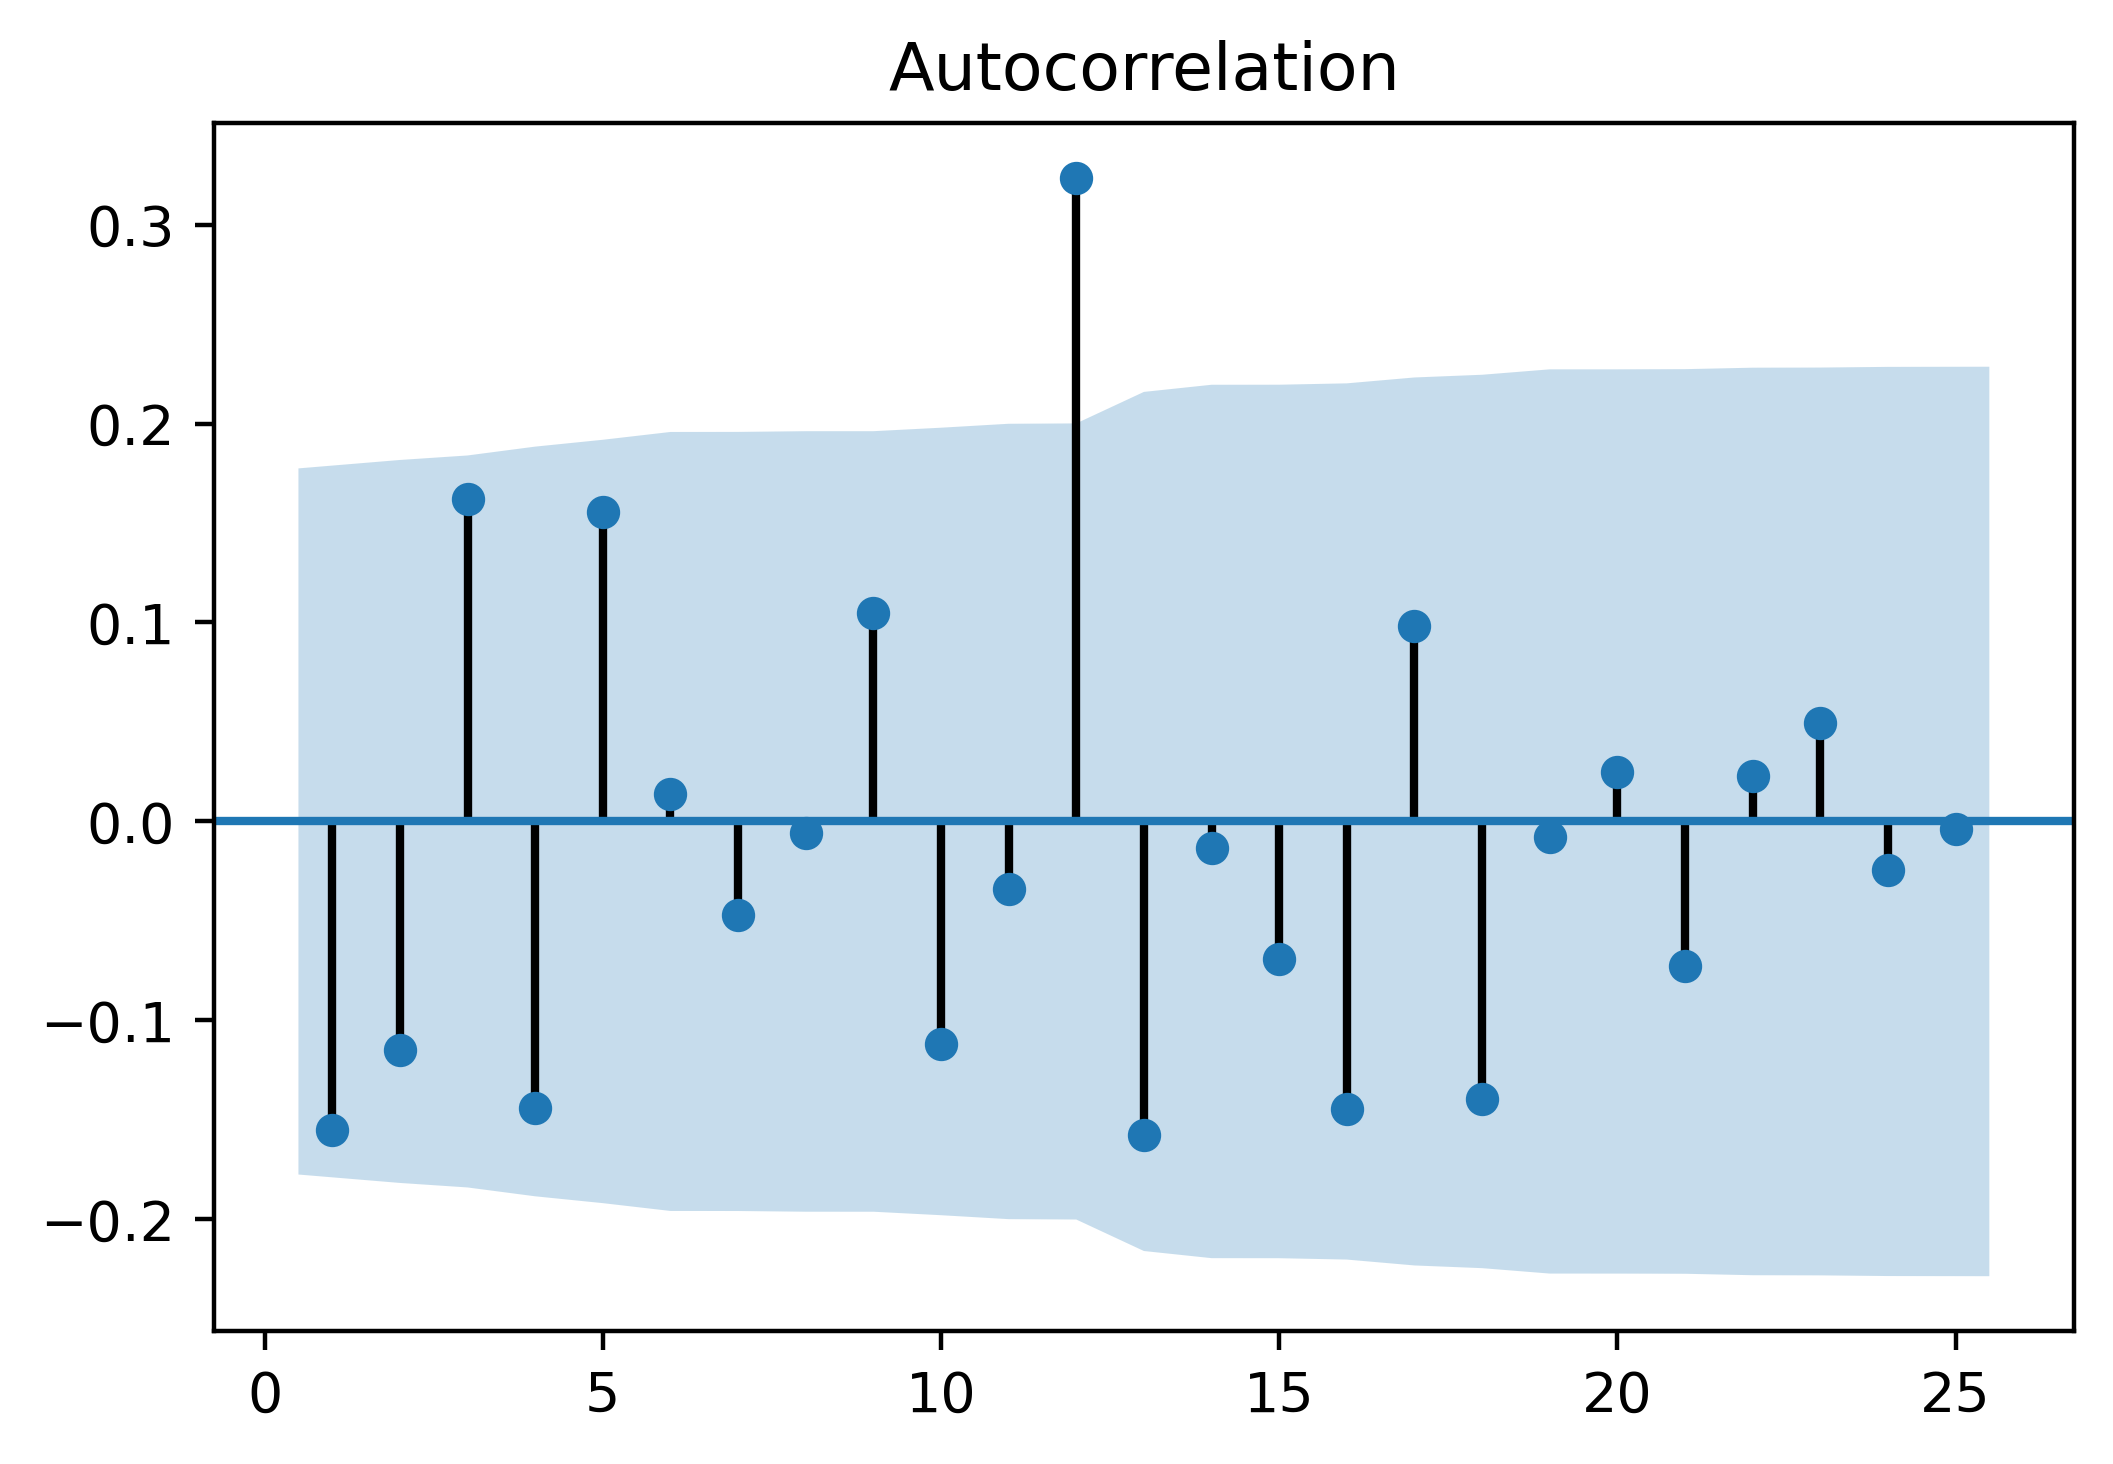

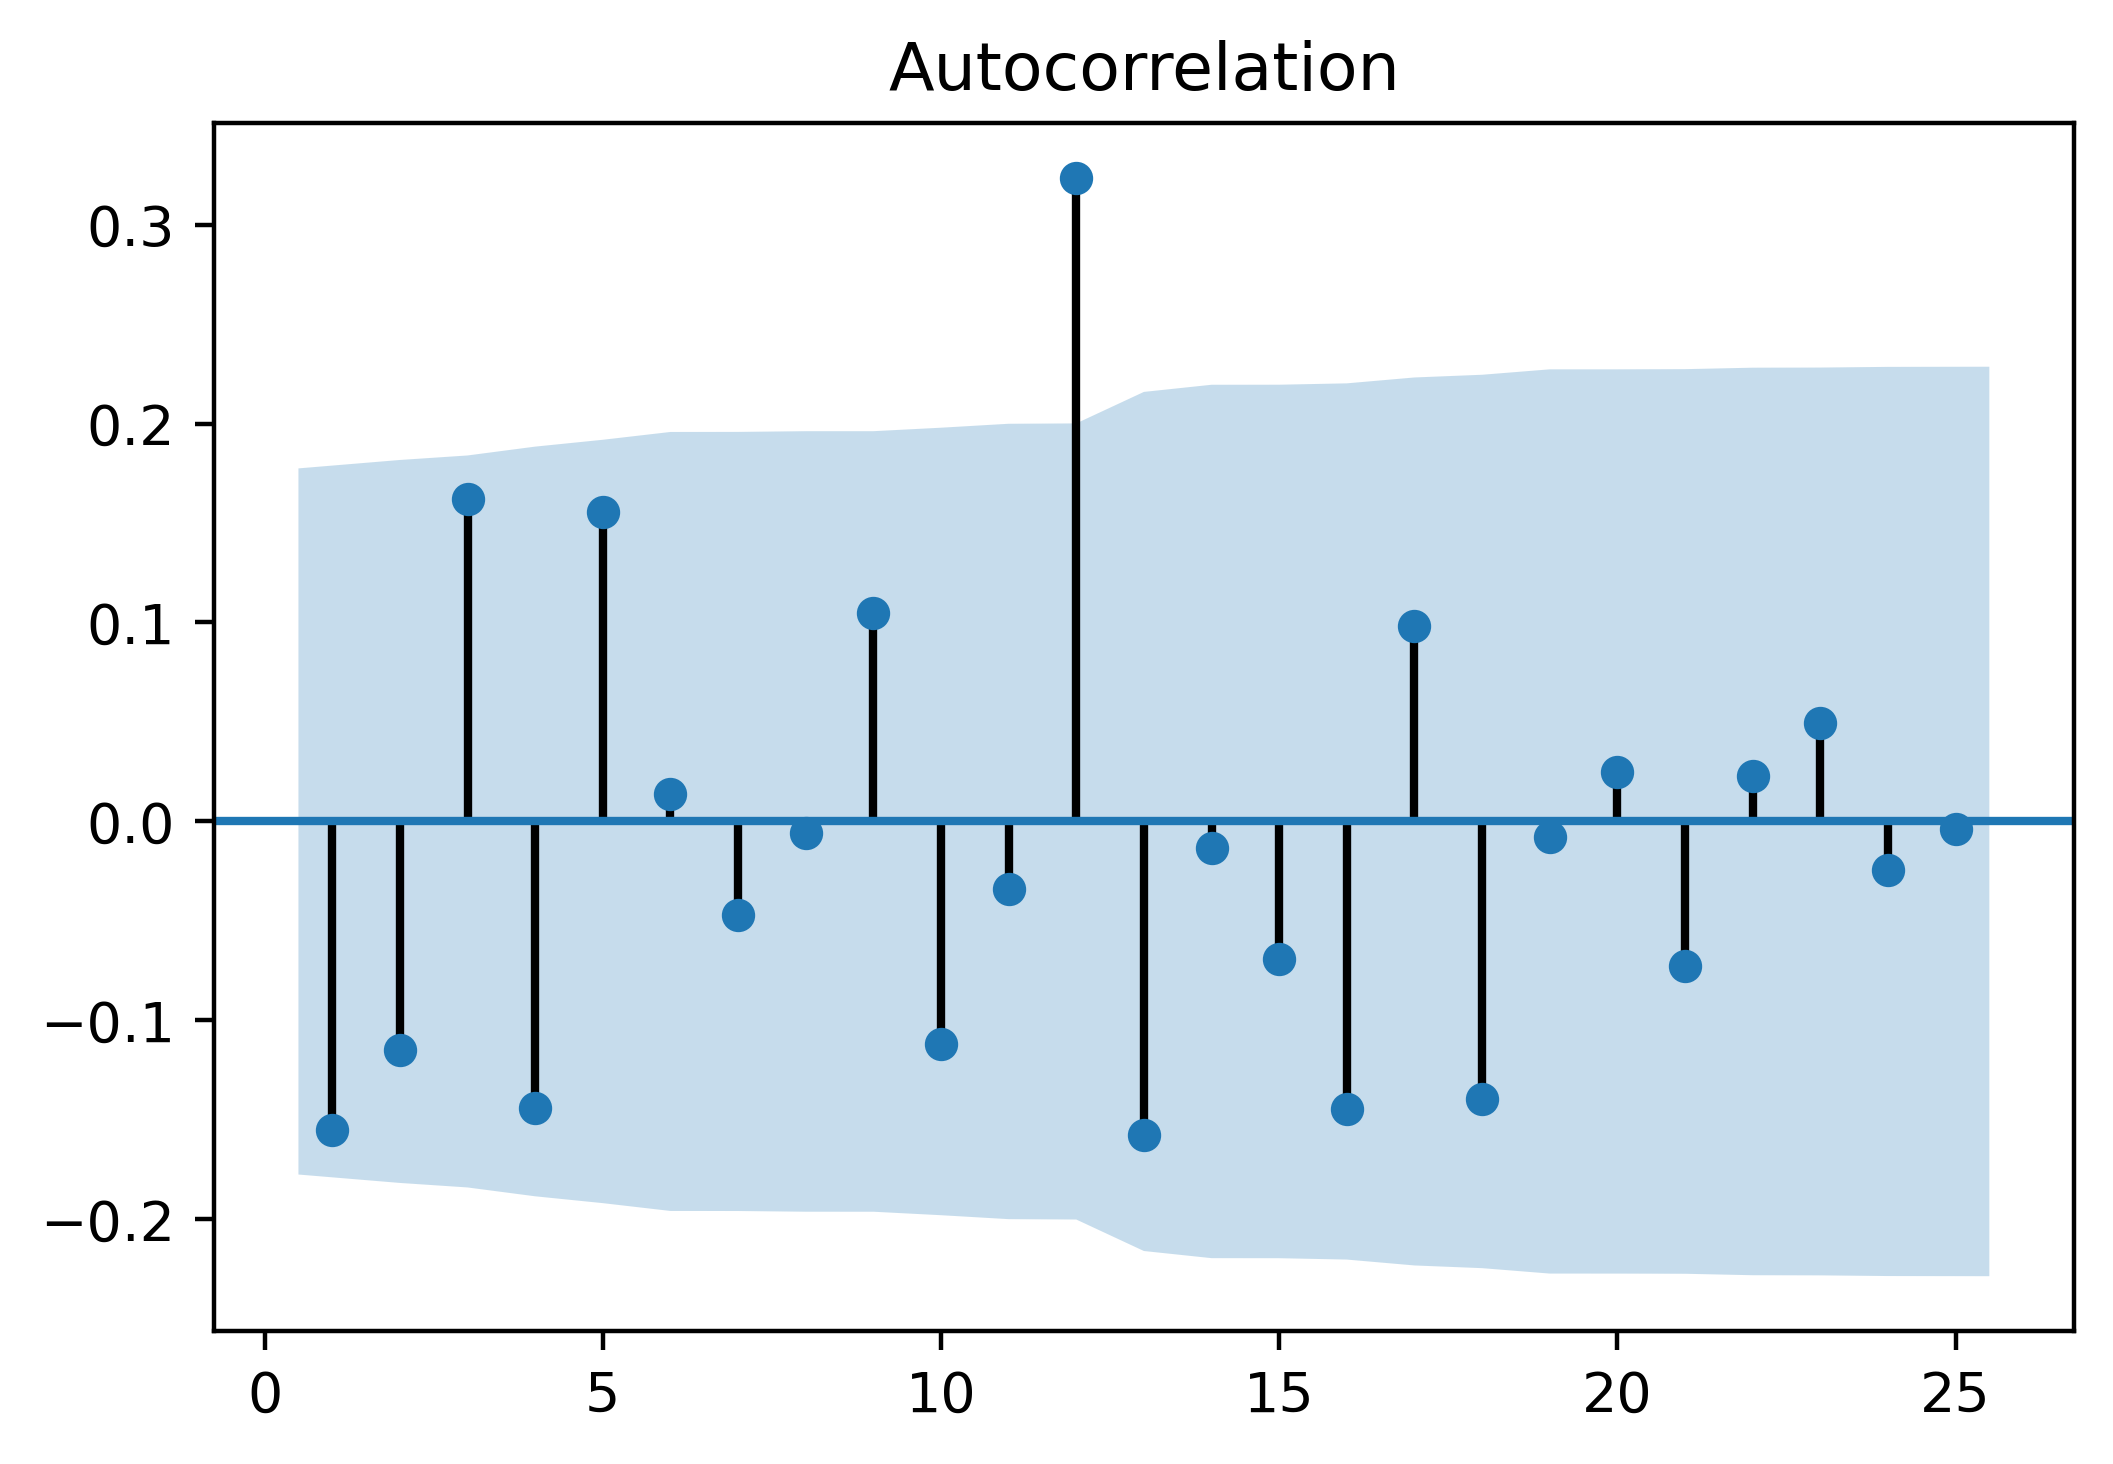

In [105]:

fig, ax1 = plt.subplots()
plot_acf(df2['water_consumers'], lags=25, zero=False, ax=ax1)